<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"></ul></div>

In [1]:
import sys
sys.path.append('..')

In [2]:
from taiko.io import *
from taiko.database import *
from taiko.profile import *
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from tqdm import tqdm
import os

sns.set(font_scale=1.5)

Using TensorFlow backend.


In [3]:
record_df = load_record_df(song_id=99)
record_df

drummer_name  song_id     left_sensor_datetime    right_sensor_datetime  \
0          aaaaa       99  L_2018-09-28_111140.csv  R_2018-09-28_111142.csv   
24       carolyn       99  L_2018-09-27_154737.csv  R_2018-09-27_154737.csv   
41          cuxi       99  L_2018-09-25_154843.csv  R_2018-09-25_154847.csv   
58          cuxi       99  L_2018-09-26_113735.csv  R_2018-09-26_113737.csv   
75        fatfat       99  L_2018-09-26_200112.csv  R_2018-09-26_200114.csv   
92           eve       99  L_2018-09-26_171226.csv  R_2018-09-26_171225.csv   
109          eve       99  L_2018-09-28_161808.csv  R_2018-09-28_161809.csv   
126       oliver       99  L_2018-09-26_183904.csv  R_2018-09-26_183921.csv   
144       oliver       99  L_2018-09-28_151120.csv  R_2018-09-28_151122.csv   
161        chris       99  L_2018-09-26_132923.csv  R_2018-09-26_132926.csv   
178        chris       99  L_2018-10-01_191551.csv  R_2018-10-01_191549.csv   
195        sheep       99  L_2018-09-27_110627.csv  R_2018-09-27_110628.csv   
213        sheep       99  L_2018-09-29_134432.csv  R_2018-09-29_134434.csv   
248  howeverover       99  L_2018-09-22_140709.csv  R_2018-09-22_140709.csv   
253  howeverover       99  L_2018-09-29_192034.csv  R_2018-09-29_192035.csv   
270      celiven       99  L_2018-09-22_141420.csv  R_2018-09-22_141419.csv   
289         john       99  L_2018-09-25_140843.csv  R_2018-09-25_140844.csv   
306         john       99  L_2018-09-28_203849.csv  R_2018-09-28_203850.csv   
323      kdchang       99  L_2018-09-25_212251.csv  R_2018-09-25_212254.csv   
340      kdchang       99  L_2018-09-28_193414.csv  R_2018-09-28_193415.csv   

                capture_datetime  
0    capture_2018_09_28_11_11_42  
24   capture_2018_09_27_15_47_37  
41   capture_2018_09_25_15_48_47  
58   capture_2018_09_26_11_37_36  
75   capture_2018_09_26_20_01_13  
92   capture_2018_09_26_17_12_25  
109  capture_2018_09_28_16_18_09  
126  capture_2018_09_26_18_39_20  
144  capture_2018_09_28_15_11_22  
161  capture_2018_09_26_13_29_25  
178  capture_2018_10_01_19_15_50  
195  capture_2018_09_27_11_06_28  
213  capture_2018_09_29_13_44_34  
248  capture_2018_09_22_14_07_08  
253  capture_2018_09_29_19_20_36  
270  capture_2018_09_22_14_14_19  
289  capture_2018_09_25_14_08_45  
306  capture_2018_09_28_20_38_50  
323  capture_2018_09_25_21_22_54  
340  capture_2018_09_28_19_34_15

In [4]:
create_all_drummer_profiles()

100%|██████████| 12/12 [00:00<00:00, 50.88it/s]


In [5]:
get_profile('aaaaa')

L_A_AI    L_G_AI  L_AX_AI  L_AY_AI  L_AZ_AI  L_GX_AI  L_GY_AI  L_GZ_AI  \
0     1.0806    6.1168   0.2594   0.9863   0.3257   2.8363  -5.2350   0.8554   
1     1.1551    6.6001   0.1999   0.9648   0.5925   3.1437   5.2923   0.6164   
2     1.2347    7.3739  -0.0564   1.1779   0.3334   4.6384   0.9268   0.3256   
3     1.1115   10.1234   0.2182   1.0113   0.3178   4.6366  -6.9199  -4.6546   
4     1.1079    7.3399  -0.0050   0.8303   0.6463   5.3733  -2.5537  -1.4920   
5     1.2673   13.3737  -0.1774   1.0633   0.3595  10.4133   4.3020   0.0168   
6     1.4003   21.7071  -0.2142   1.3560  -0.1159   7.9160 -19.6067   1.6559   
7     0.9456   16.3678  -0.1304   0.7655  -0.1061  10.8841   7.8717  -0.3858   
8     1.6695   15.5976  -0.3728   1.4952  -0.4719   4.0183 -11.4969   7.9272   
9     0.7486    8.0039   0.1095   0.5172  -0.0830  -0.9567   5.1696   1.3317   
10    1.4845   16.2571  -0.2614   1.3768  -0.3538   1.3523  -8.1809  13.3029   
11    1.0083   16.0012   0.6253   0.5863  -0.3680  -9.6451  -7.7930  -1.2998   
12    0.9393   16.0890  -0.3162   0.3370   0.2080  -0.9933  13.6853  -1.4801   
13    1.2208   15.9209  -0.1076   1.1523  -0.0022  -5.0262 -12.1653   7.9065   
14    0.6811   10.8391   0.2642   0.1382   0.0143  -1.4038   8.7472  -2.9920   
15    1.1434   15.6831  -0.2717   1.0866   0.0407   0.8085 -12.4872   8.2443   
16    0.7815   14.6293   0.3992   0.3759   0.0574  -3.4979   1.8090   0.8126   
17    0.8634   15.8142  -0.2688   0.6862  -0.3401   3.9380  -2.6593   4.8355   
18    0.9277   15.8508   0.3830   0.4989   0.1123  -5.1242  -5.9317   2.1878   
19    0.6950   21.8015  -0.2165   0.1370  -0.1232   4.8789  15.5825   0.1932   
20    1.1278   21.9340   0.0729   1.0359  -0.1389  -3.4469 -20.4737   5.3726   
21    0.7733   15.6142   0.1321  -0.1449   0.0428   1.0254  13.7161  -2.9743   
22    1.0880   18.4836  -0.2741   0.8726  -0.3755  -0.1769 -15.0733   9.6280   
23    0.9218   15.3117   0.6676  -0.1893  -0.0337  -3.9676   5.1156  -3.1959   
24    1.0049   13.5758  -0.7122   0.6397   0.0186   3.4986  -1.0642   7.4249   
25    1.3223   18.7670   0.8099   0.3338  -0.5120  -4.0619 -11.7316   7.4194   
26    1.0677   16.6091   0.0948  -0.0241   0.3947  -2.8817  14.8254  -4.9176   
27    1.8070    9.5537  -0.2010   1.7217  -0.1127  -0.9021  -5.2570   7.2223   
28    1.5182   13.1029   0.3555   1.4067  -0.3616  -5.3314 -10.4938  -4.1626   
29    1.3485   13.0766   0.3160   1.0162   0.3612   0.6397   7.8088  -3.4558   
..       ...       ...      ...      ...      ...      ...      ...      ...   
195  10.1748  117.2999   0.8148  -0.0301  -0.4819 -11.0745 -16.0160  -2.2706   
196   9.8367  120.1030  -0.1200   0.4670  -1.3279   9.0589 -13.6039 -22.9724   
197  12.9187   83.1793  -0.5738  -1.8390  -0.9119   4.4041  16.0922   1.2900   
198  10.3199   97.1498  -3.0850   0.2232  -1.3384  -5.7342 -46.1243  15.7977   
199   9.4943  106.4037   1.0213   0.6329   0.5442 -14.5477 -59.9671  16.4282   
200   7.2830   92.7003   2.0322  -1.1678   0.5950  -9.3322  11.5133 -13.4659   
201   8.1361   92.6169   0.3464  -0.7681  -1.5431 -11.8954  -5.6546 -17.8339   
202   7.7243  119.8118   1.2951  -1.0070  -3.7331   9.8380  20.1382  15.2880   
203   5.8210  105.6620  -4.5992   1.2329   1.7479  -8.9206  27.9135   5.2179   
204  11.0219  113.5482   1.9011  -1.9024  -0.1534 -16.6900 -11.9114  -4.5706   
205   8.4918   98.3377   1.5809  -1.3540  -0.8644  15.0986 -53.6768  13.1067   
206   8.0627  193.8826  -1.2170  -0.3907  -4.8590  27.4424   1.5335  24.4339   
207   6.6988  153.0251  -0.3635  -0.1223   0.0147  -0.4934  25.4308  -7.3007   
208  10.8209  132.1957   0.0126  -1.8347  -2.0172 -15.3872 -14.4202 -20.3290   
209  12.8162  136.8906  -0.8450  -0.7292  -4.1005   3.8697  30.2020   7.7182   
210   8.7239  130.6660  -4.9601   0.7102   0.2386  16.3248 -16.2348  36.1212   
211  11.3549  114.4543   3.5729  -1.7711   1.2690  -3.8973  46.9055 -52.5421   
212  10.3108  158.4065  -0.1174  -0.6809  -2.0002  -7.6718   8.3569   7.9330   
213   

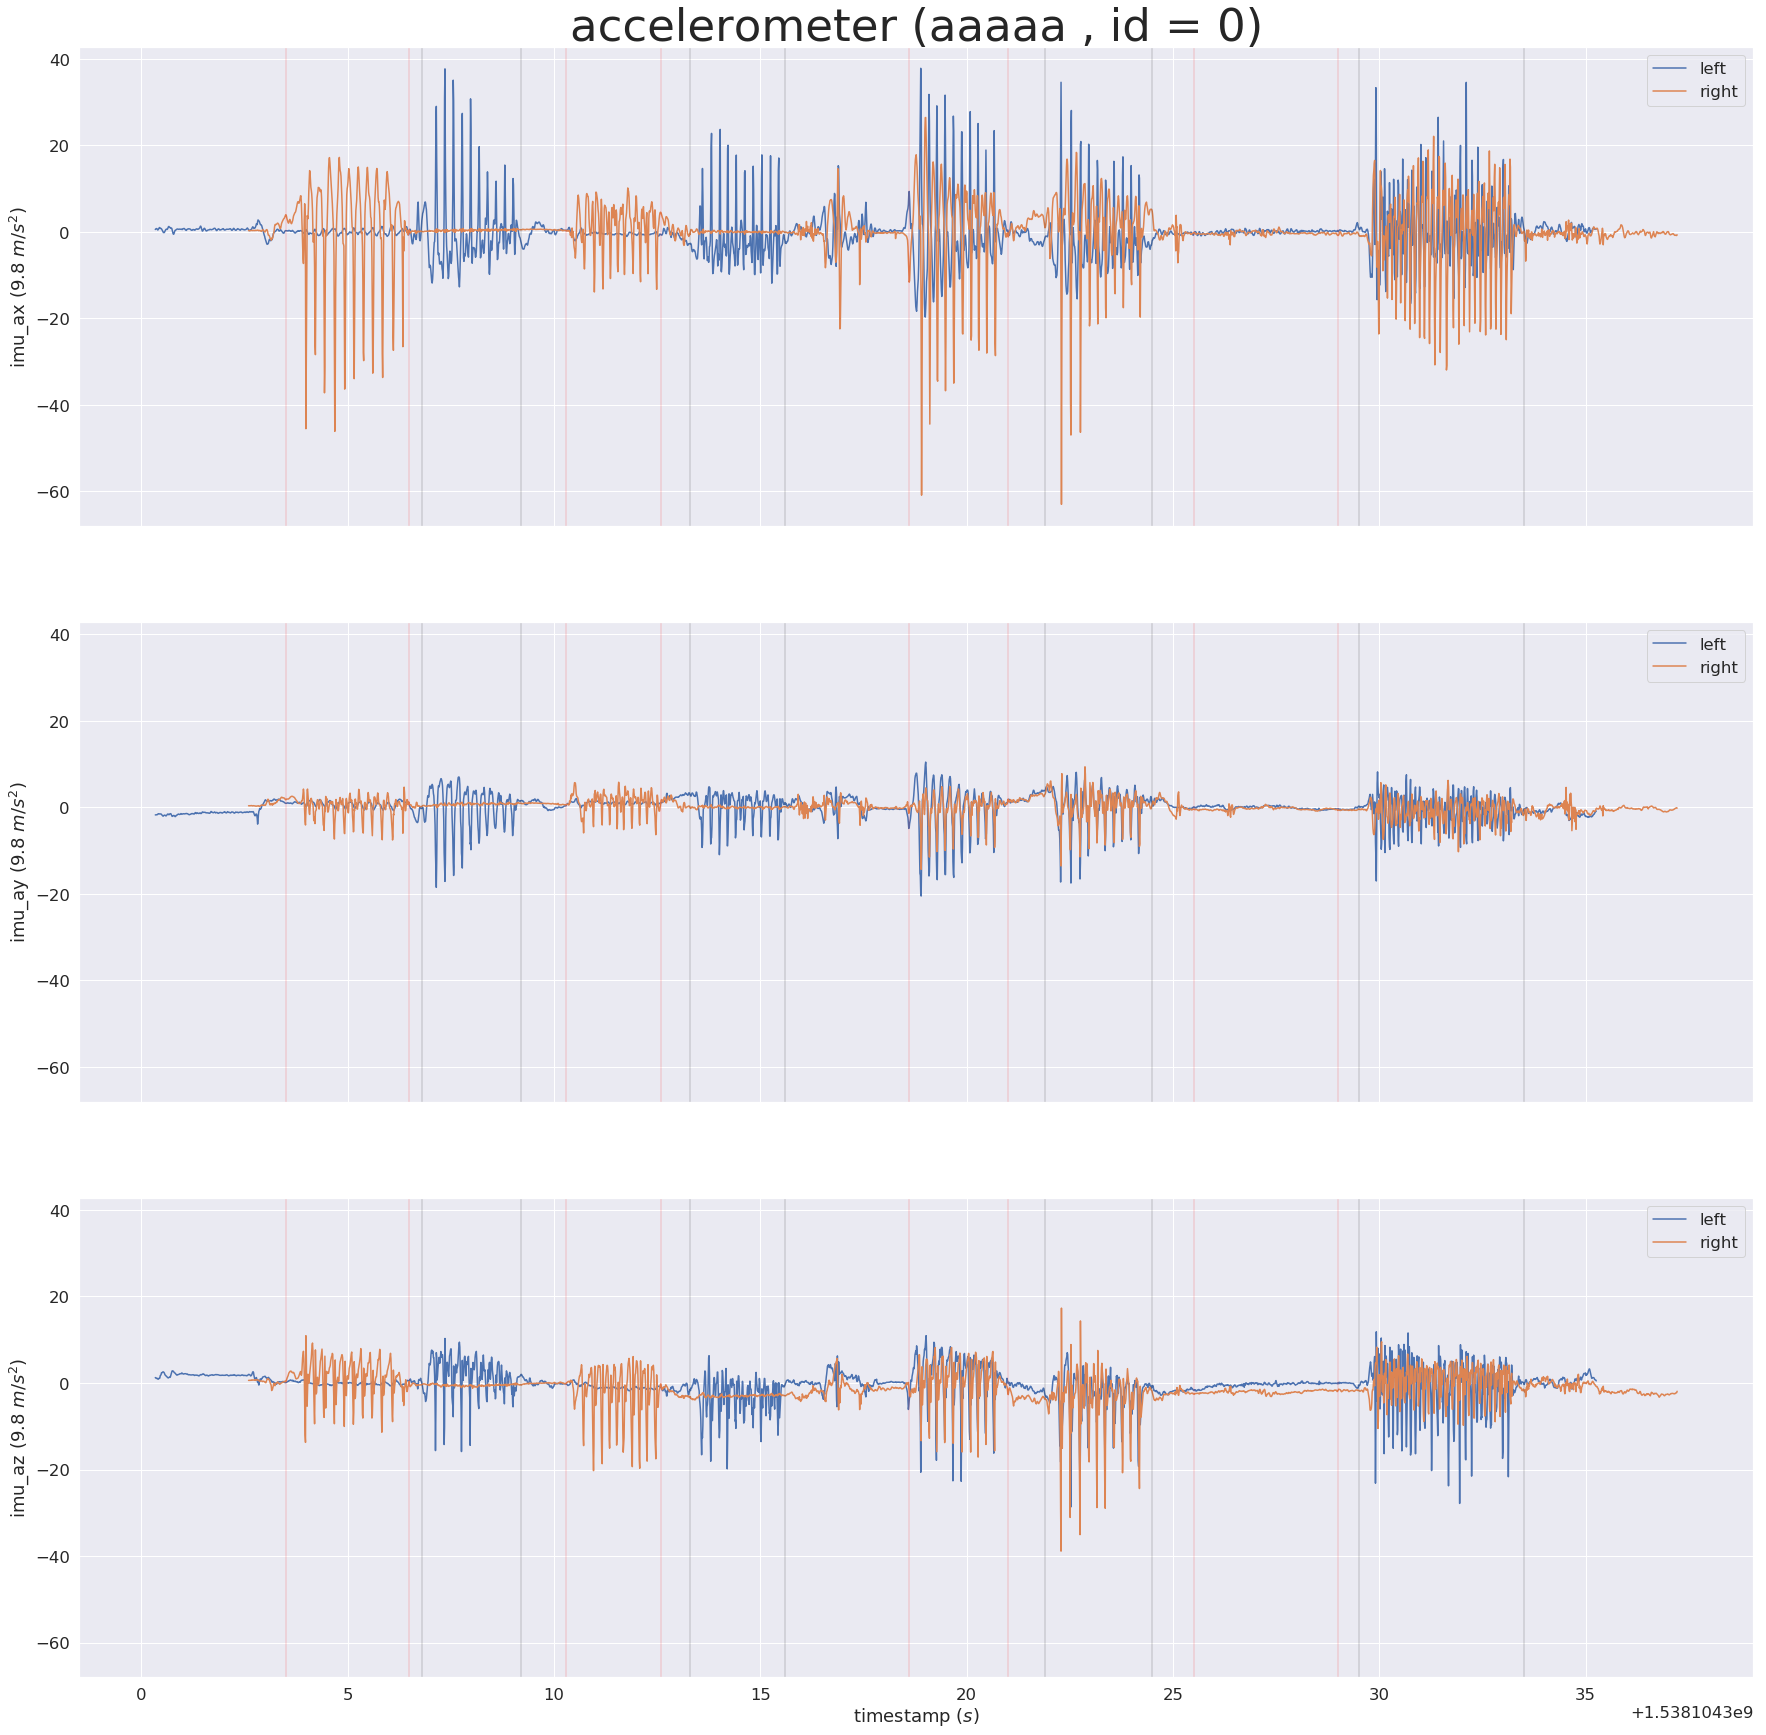

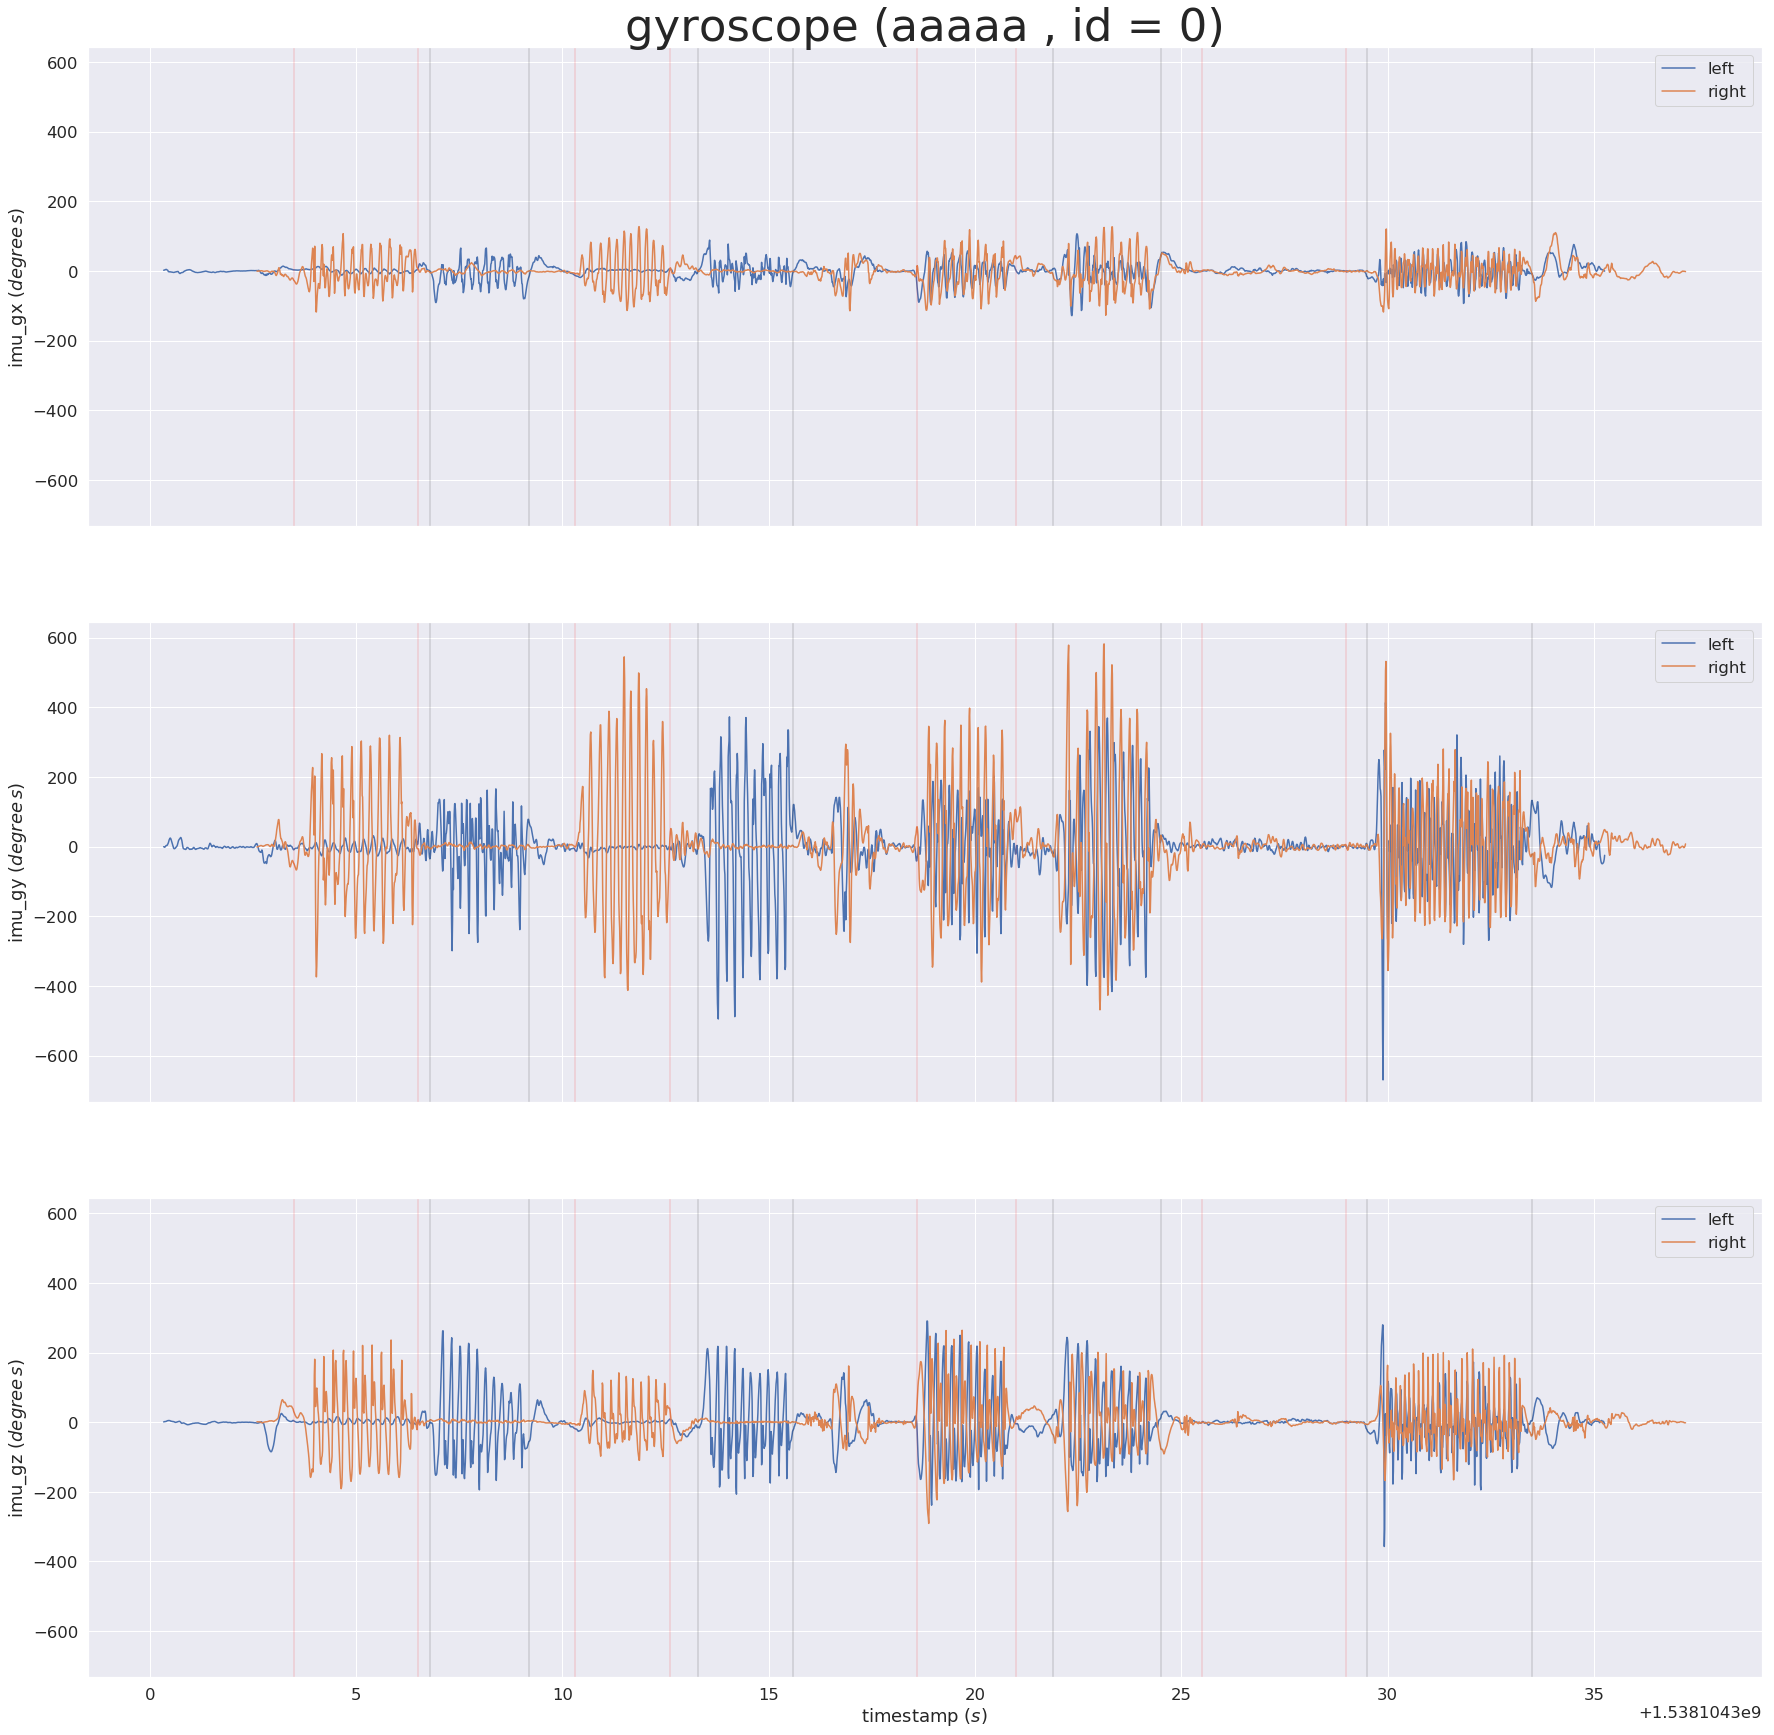

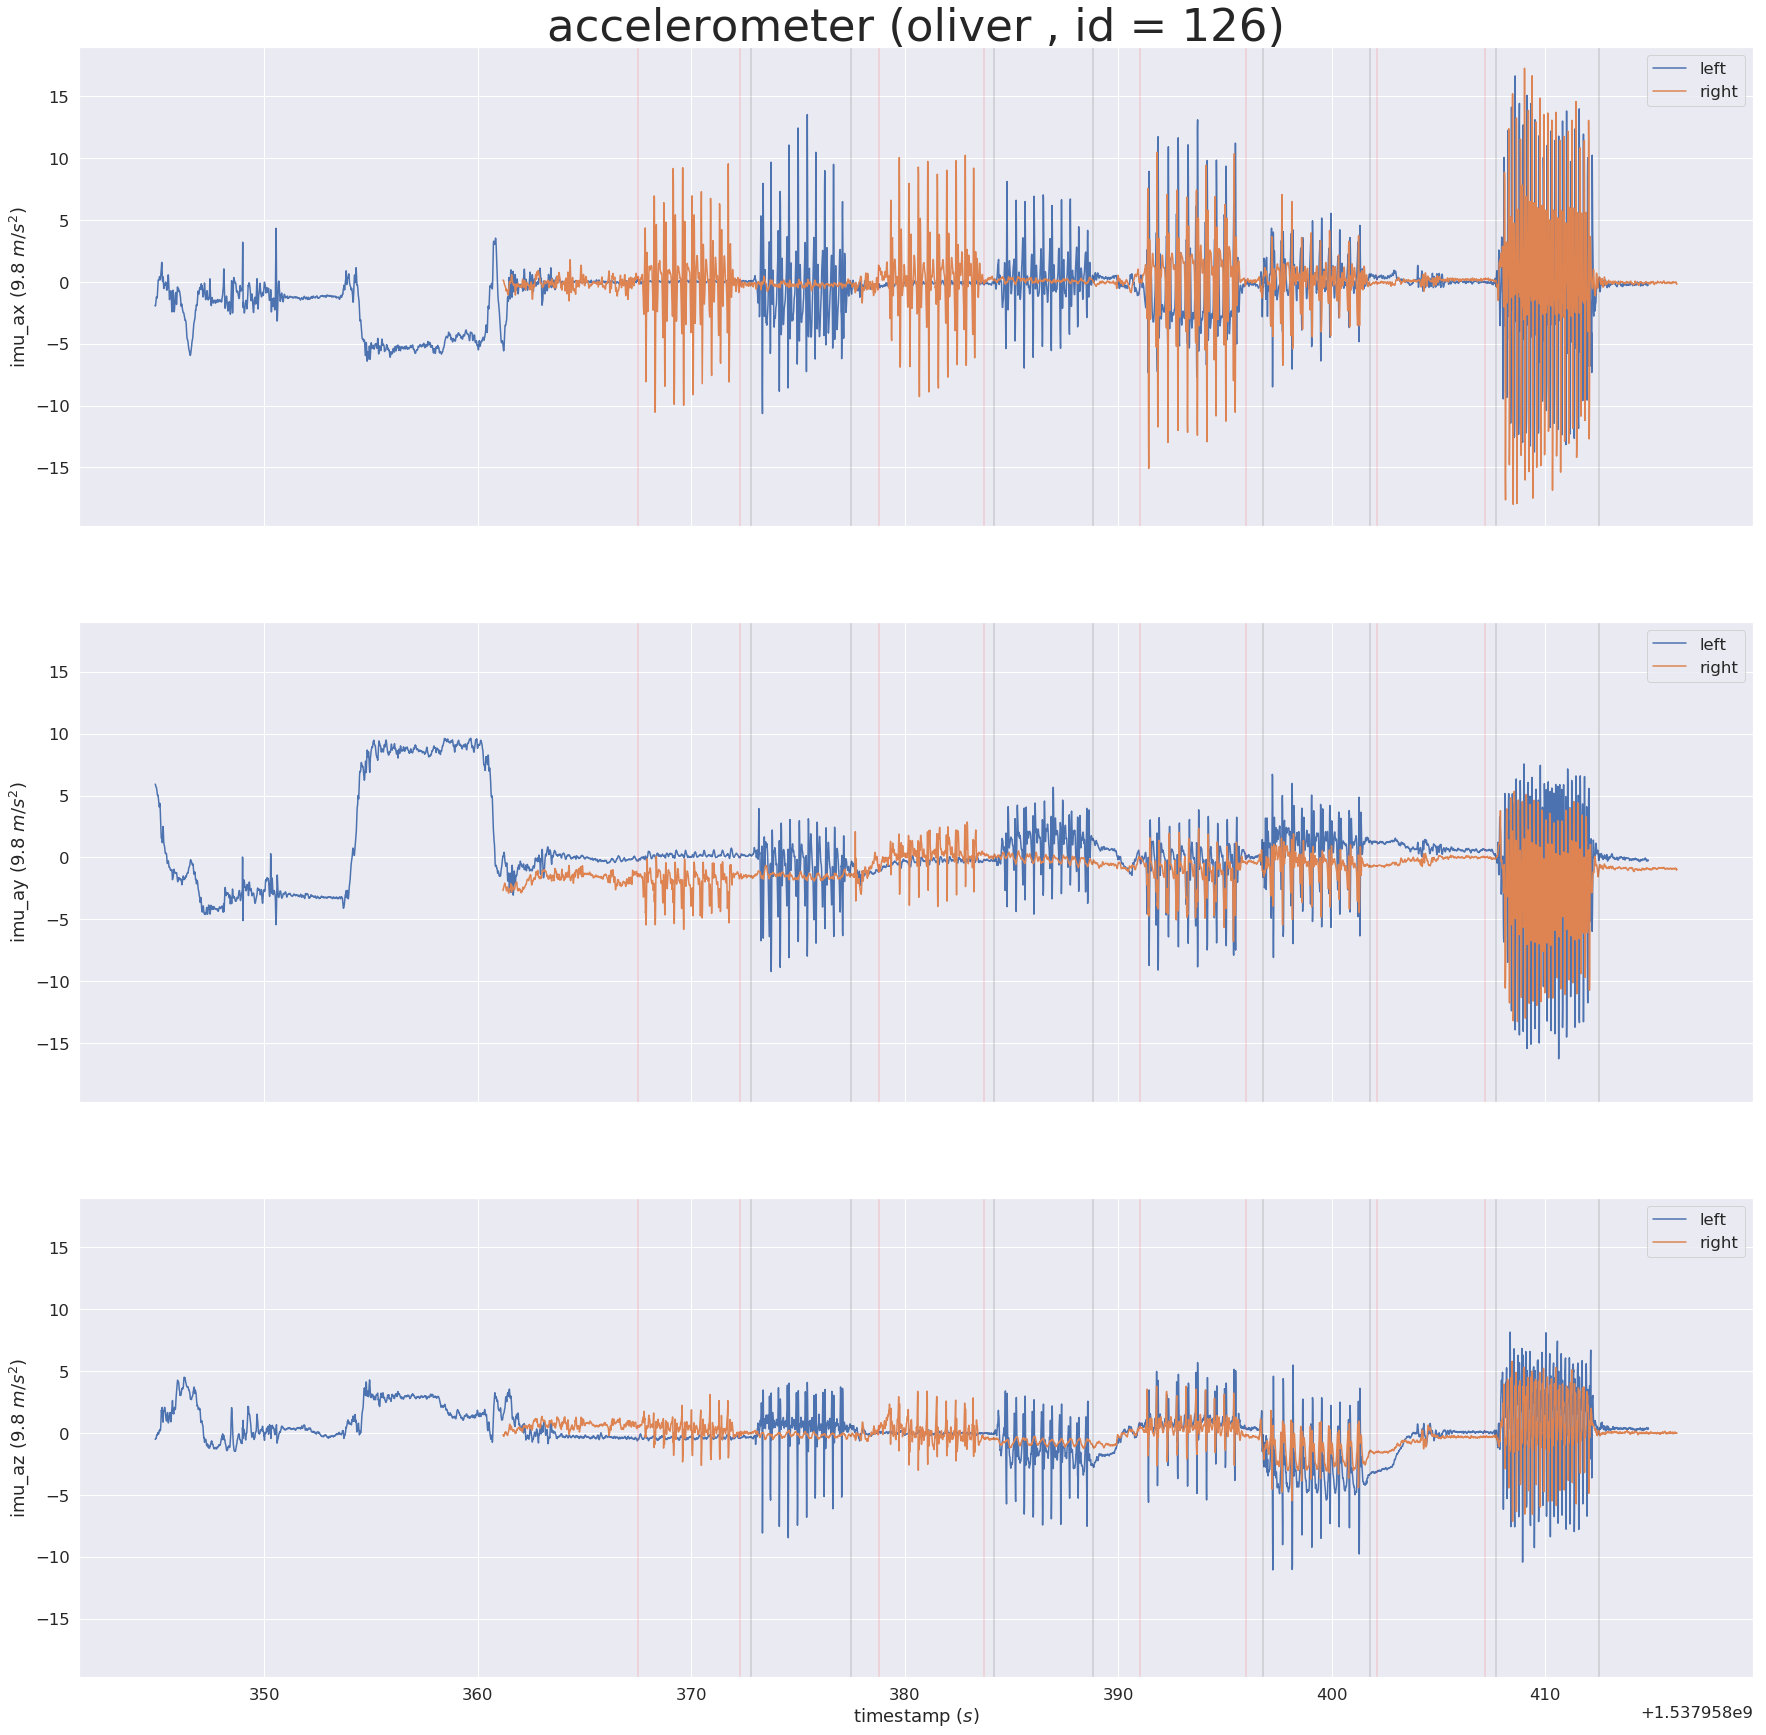

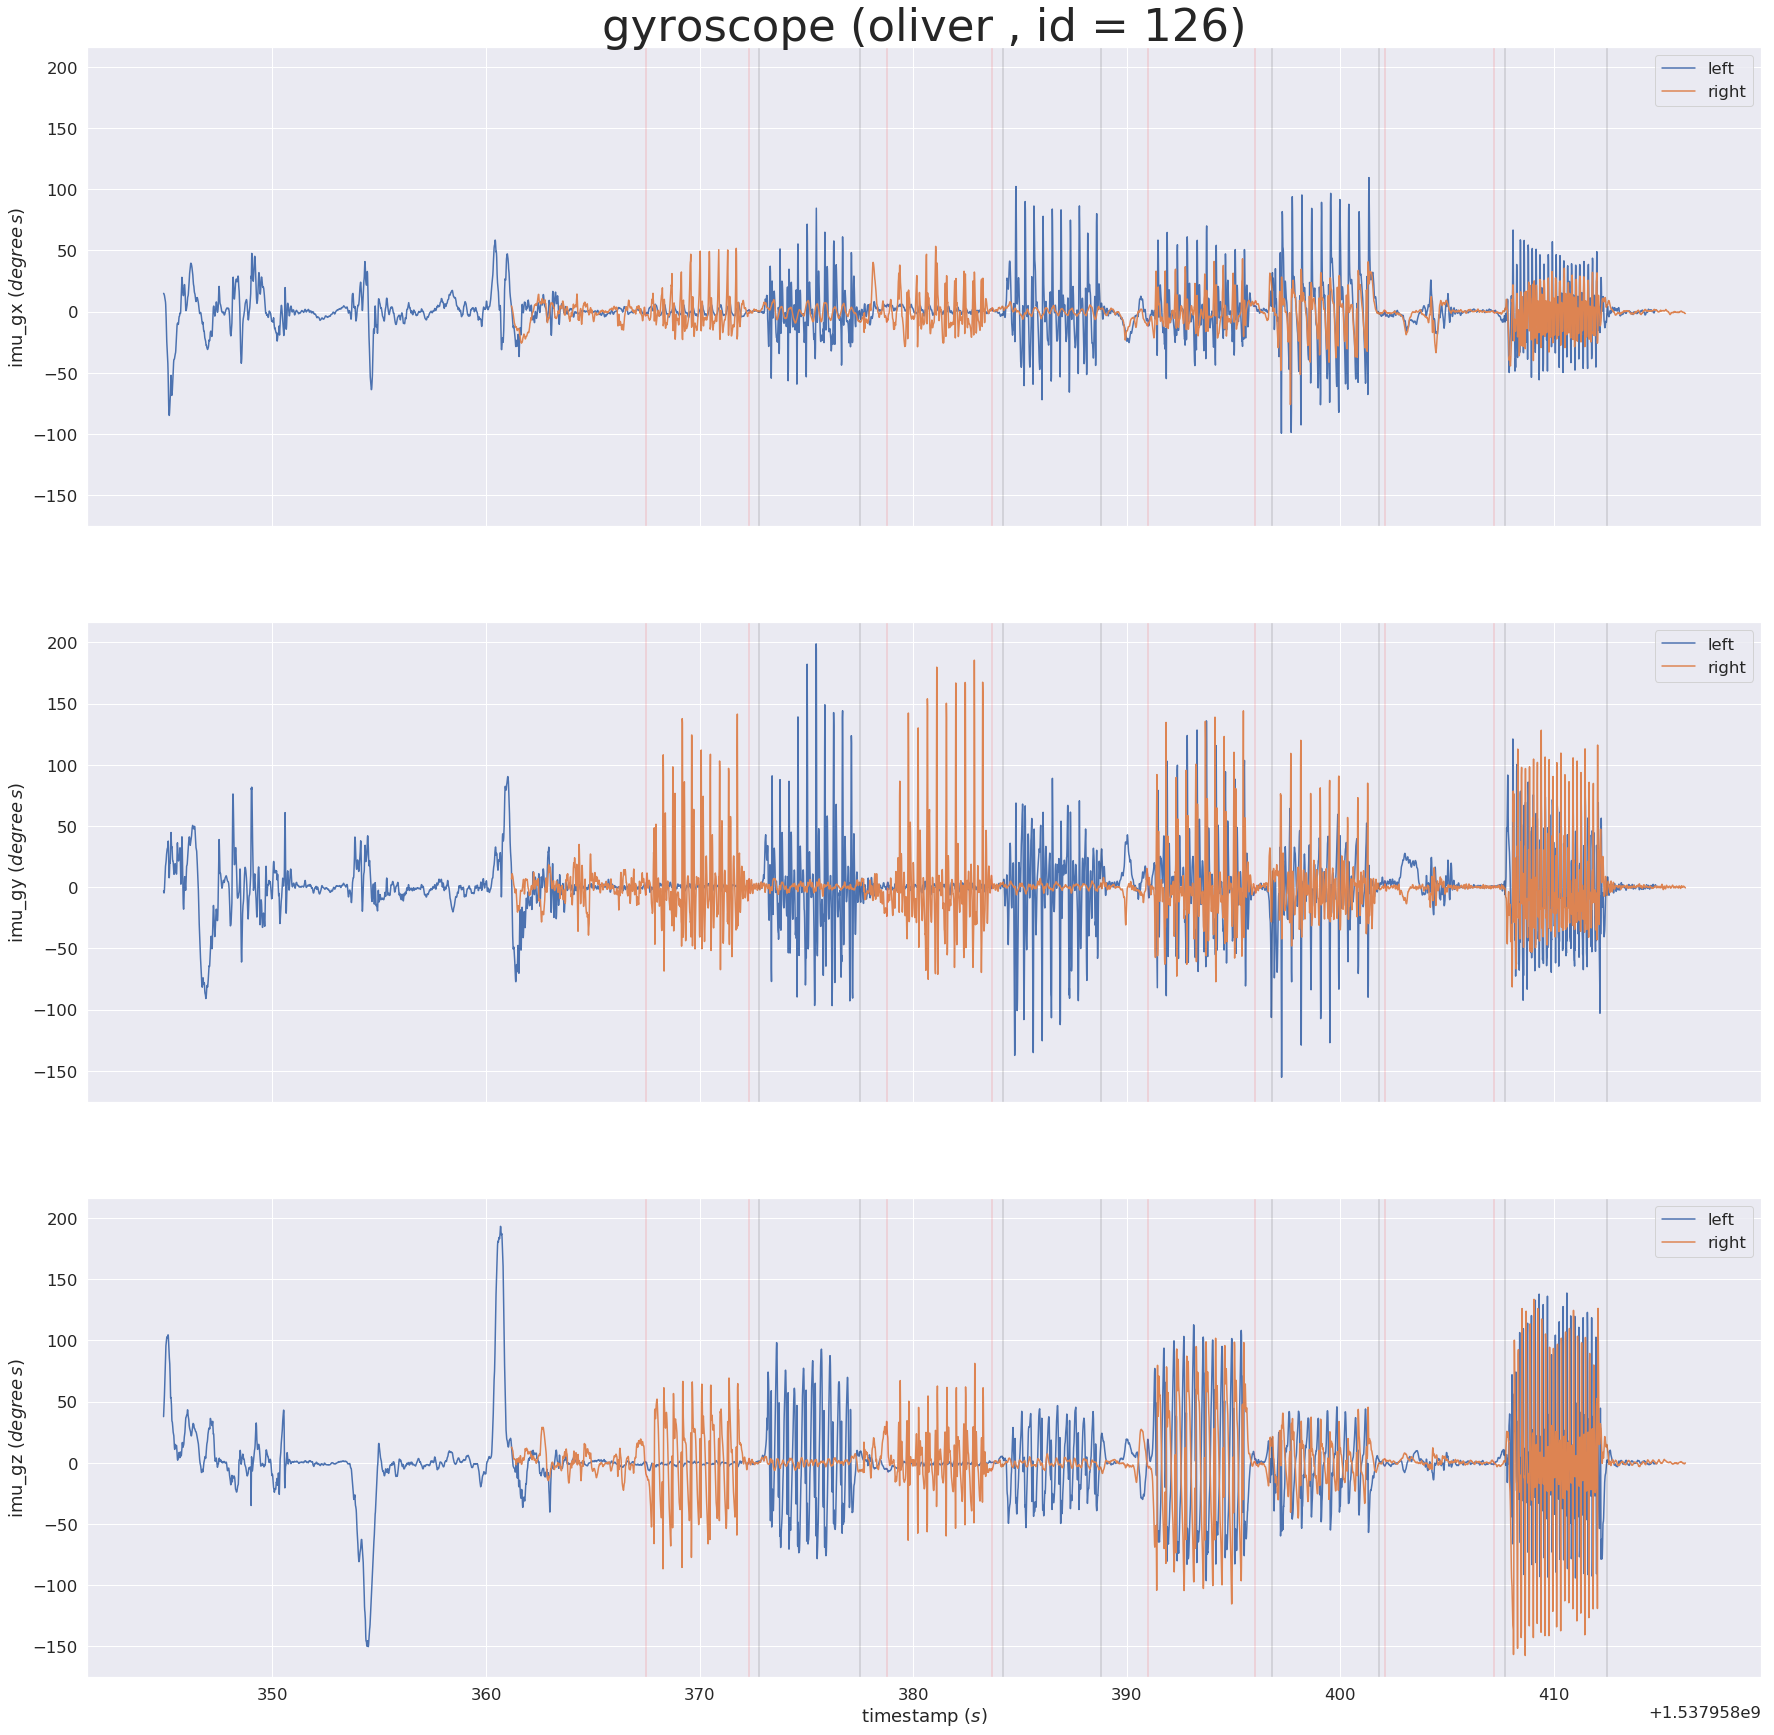

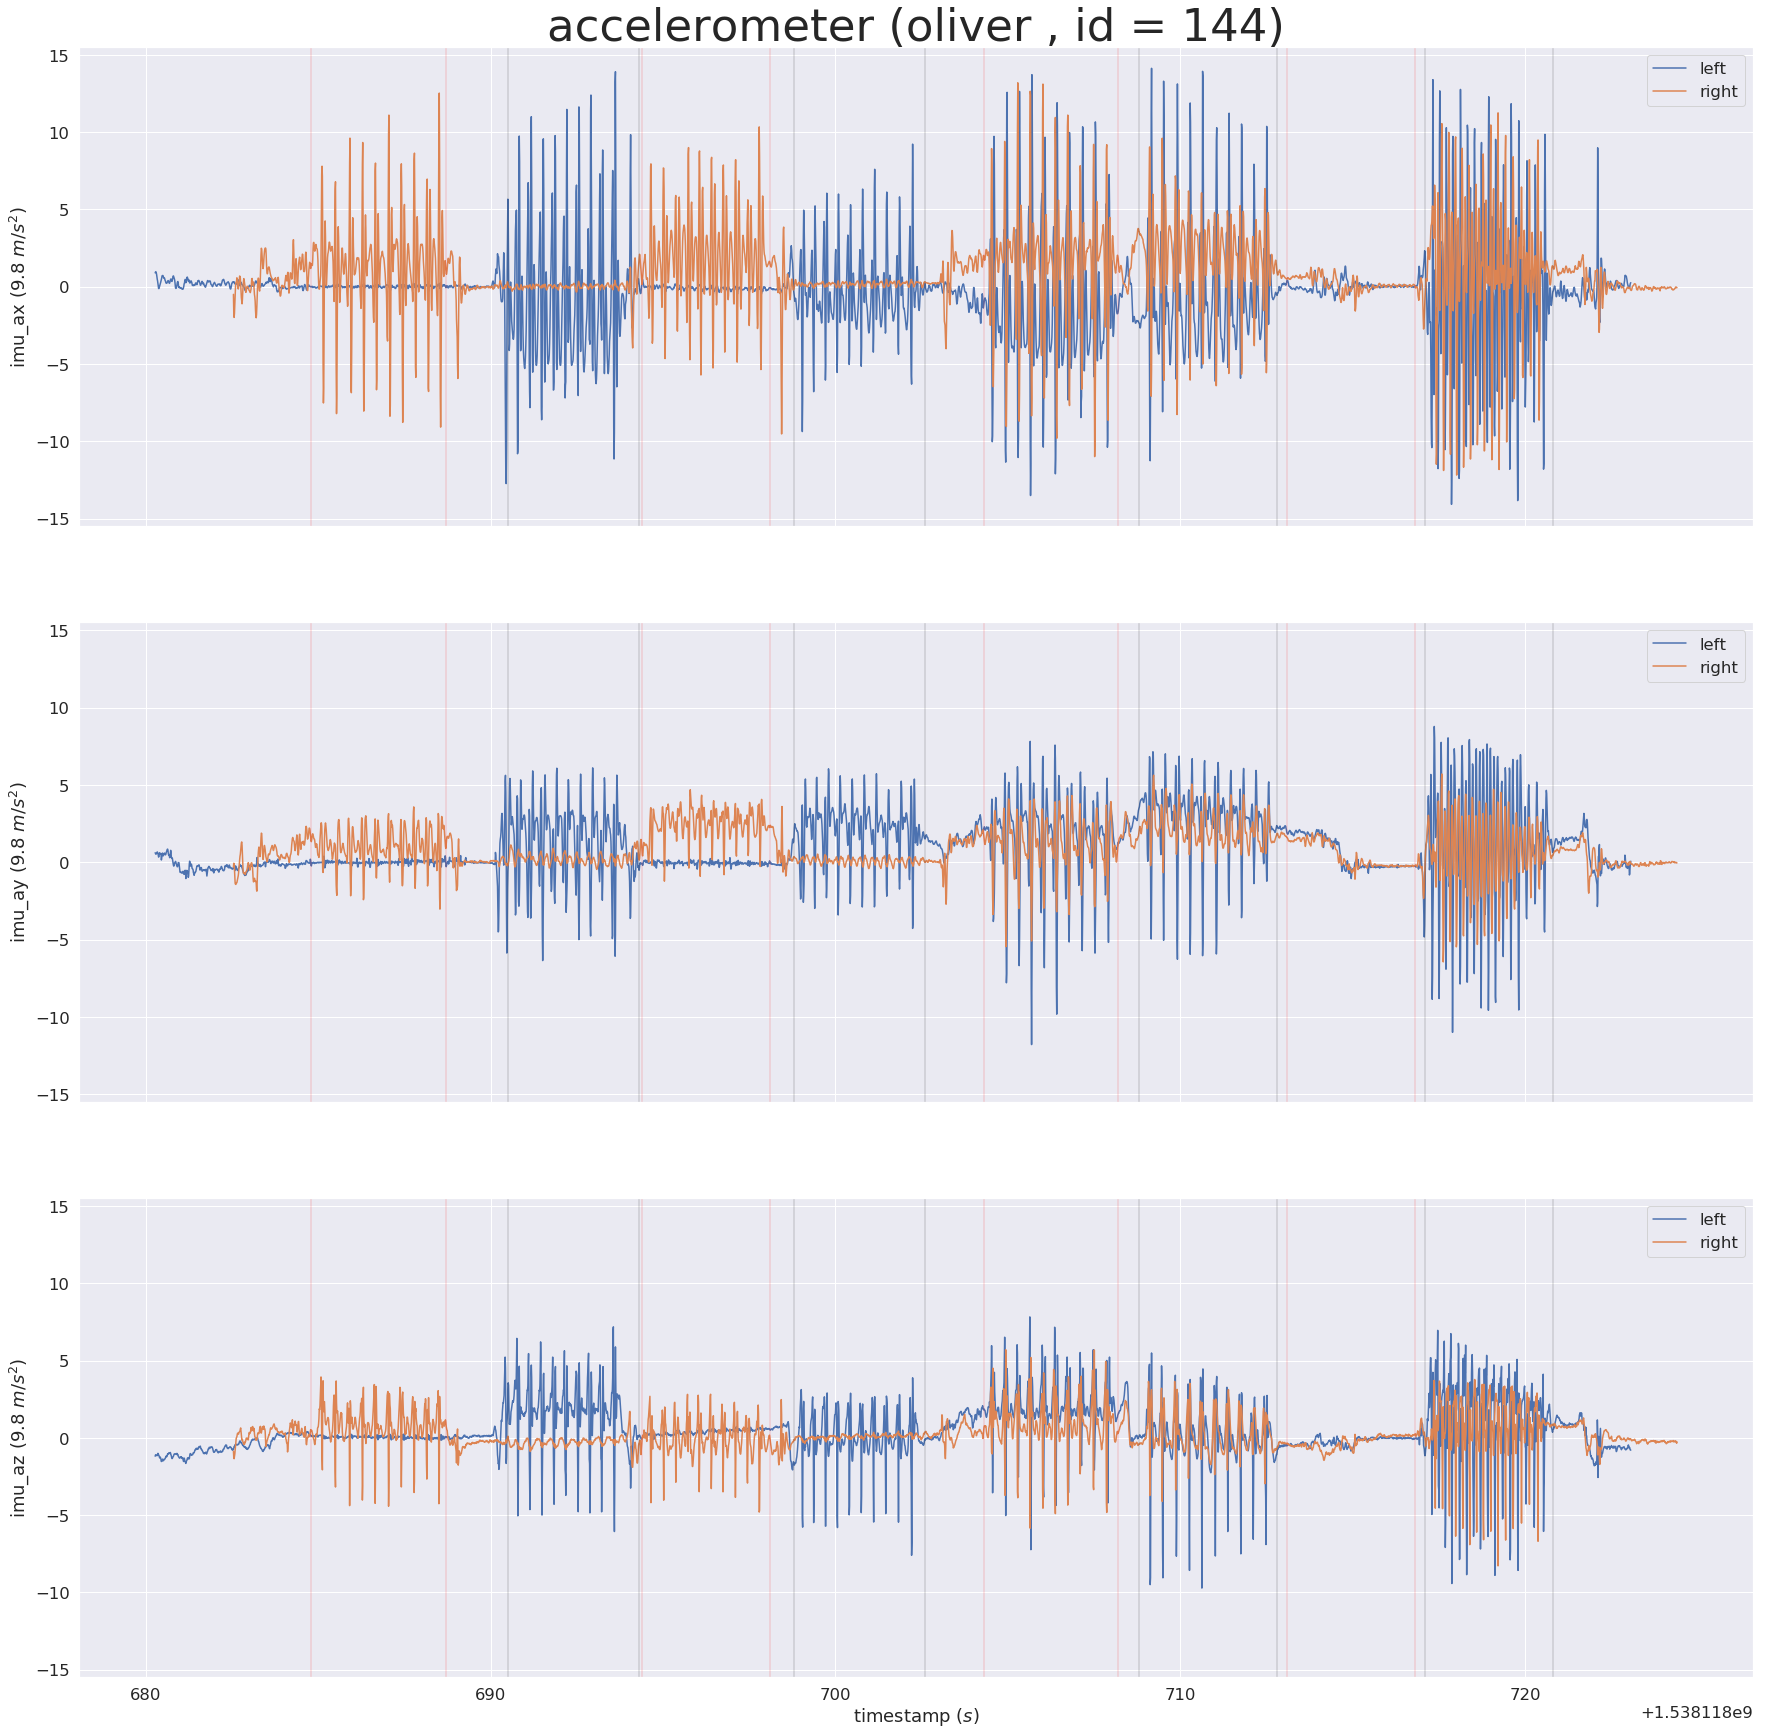

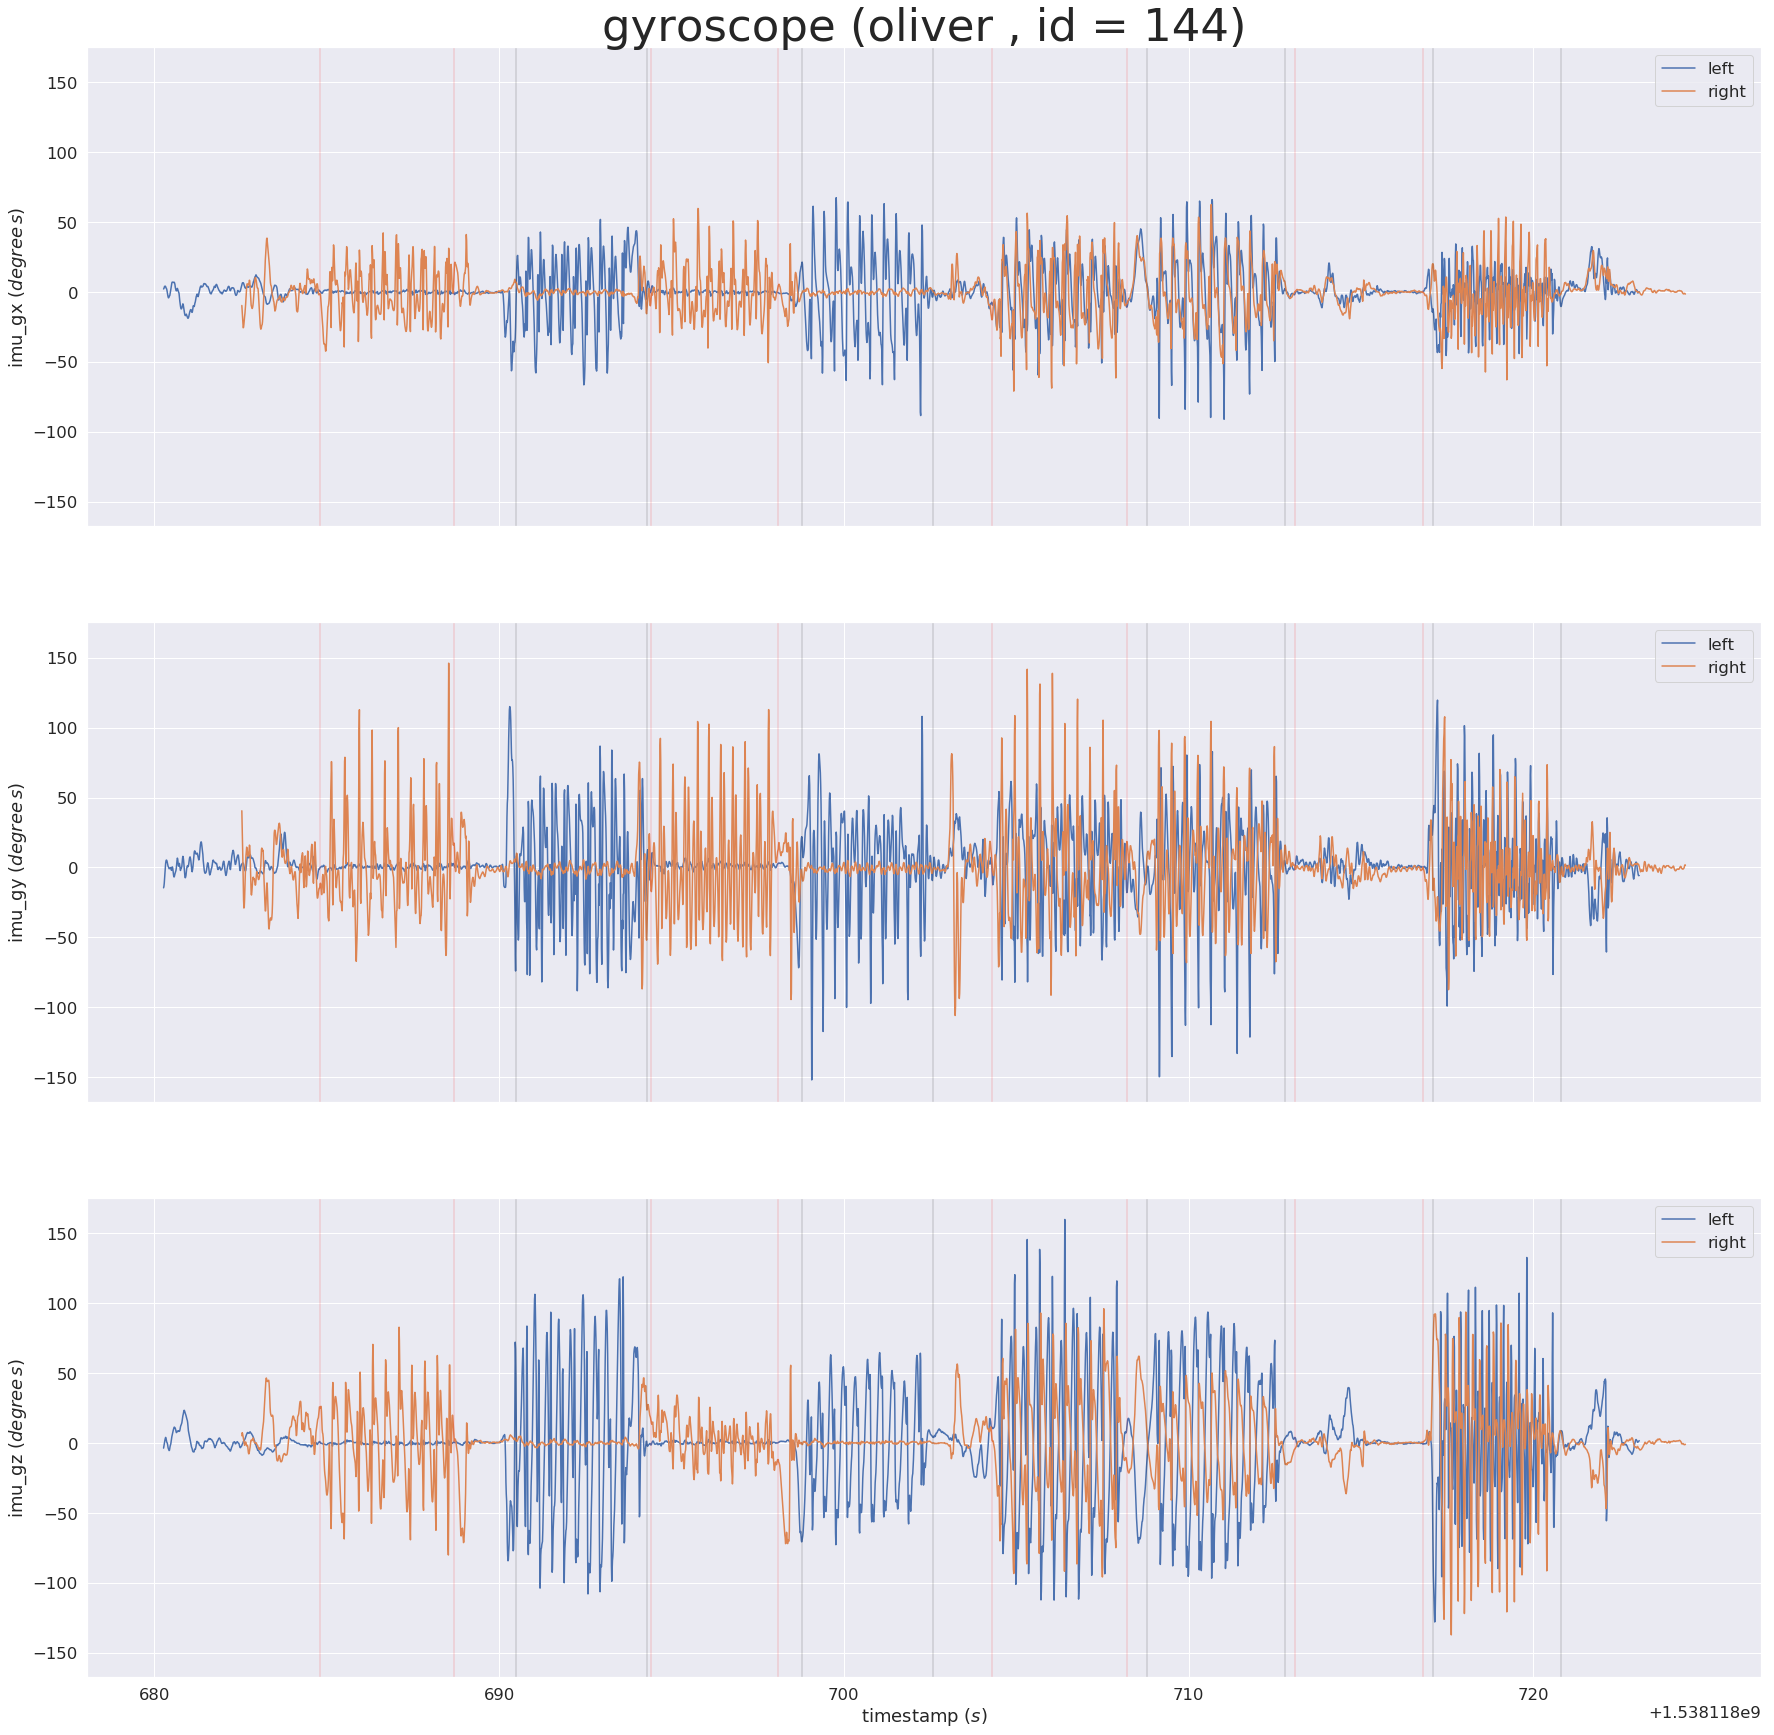

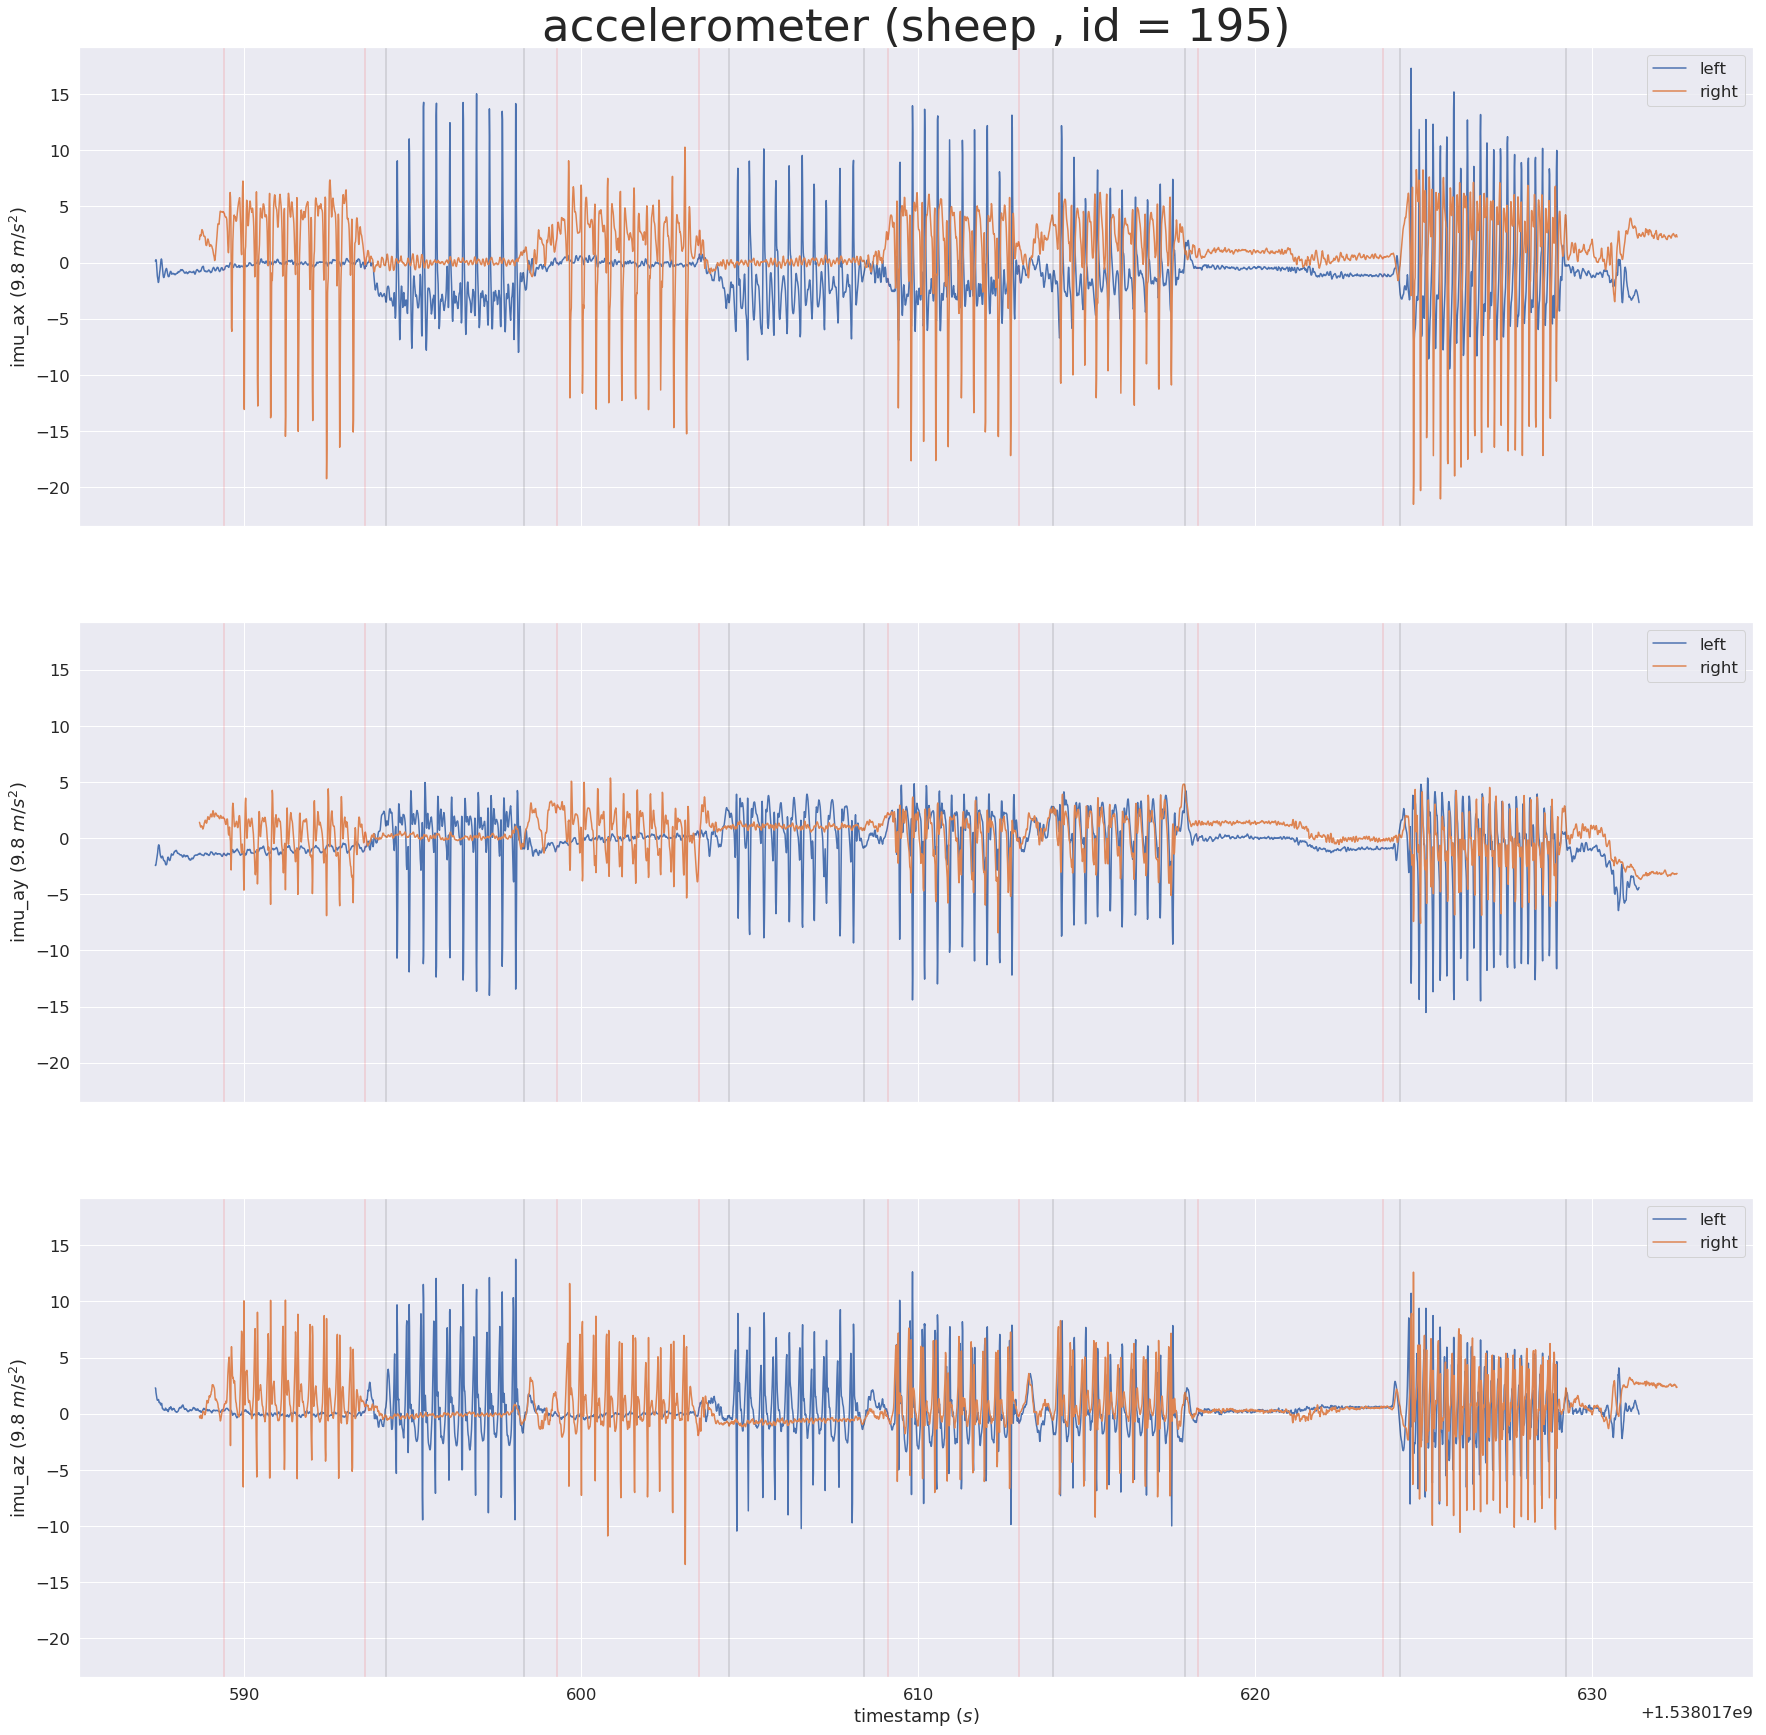

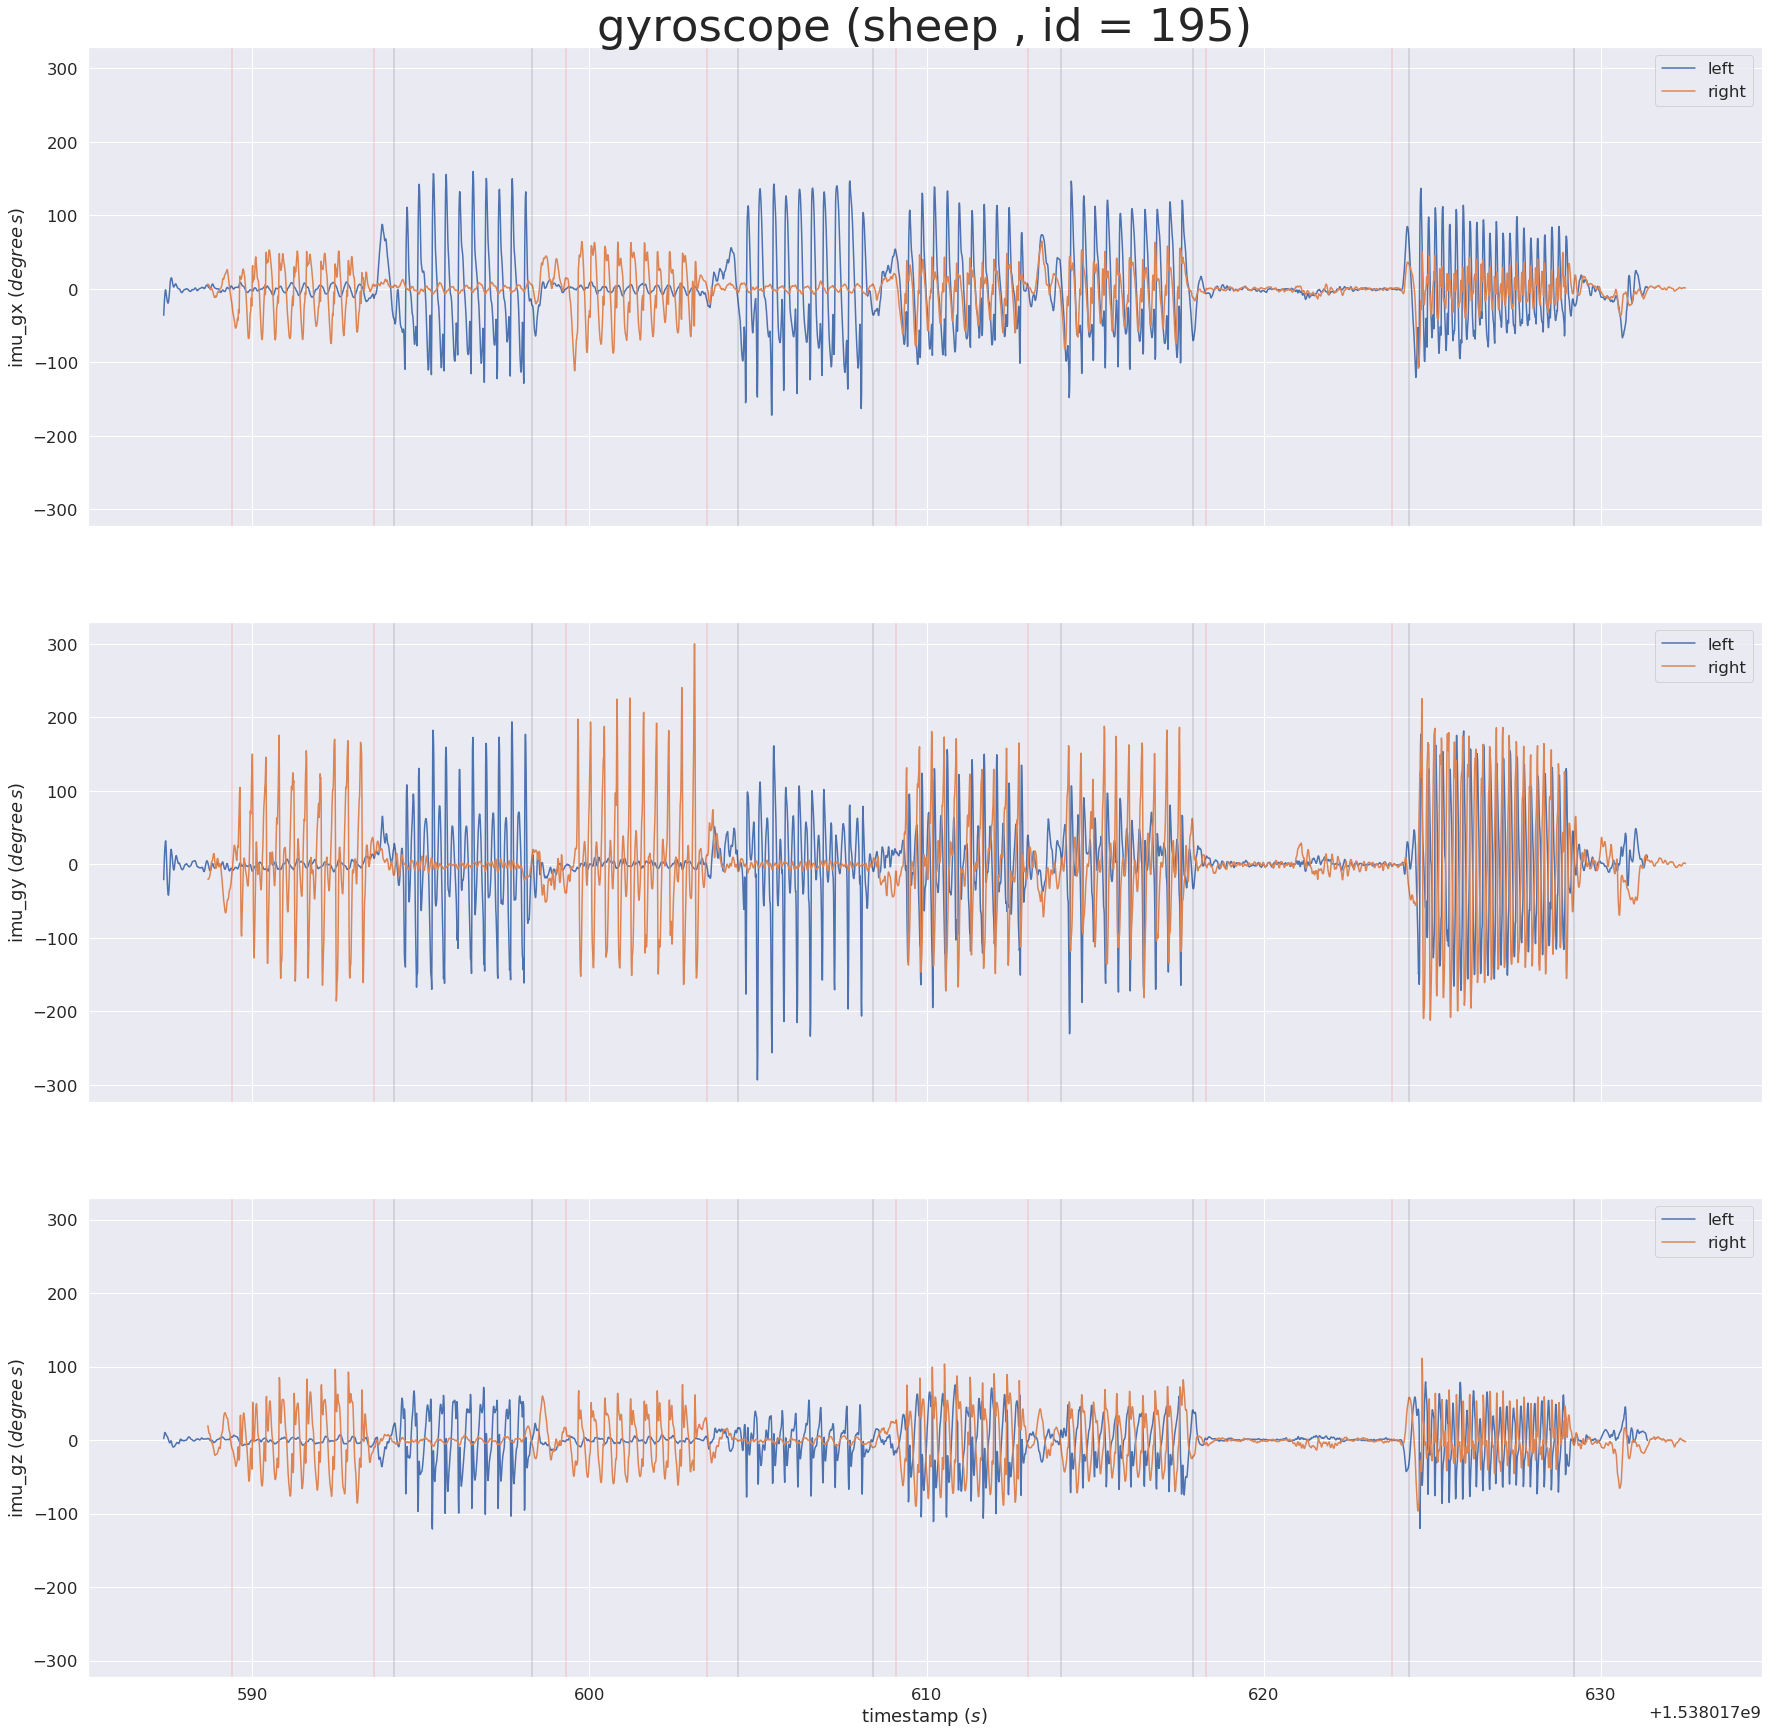

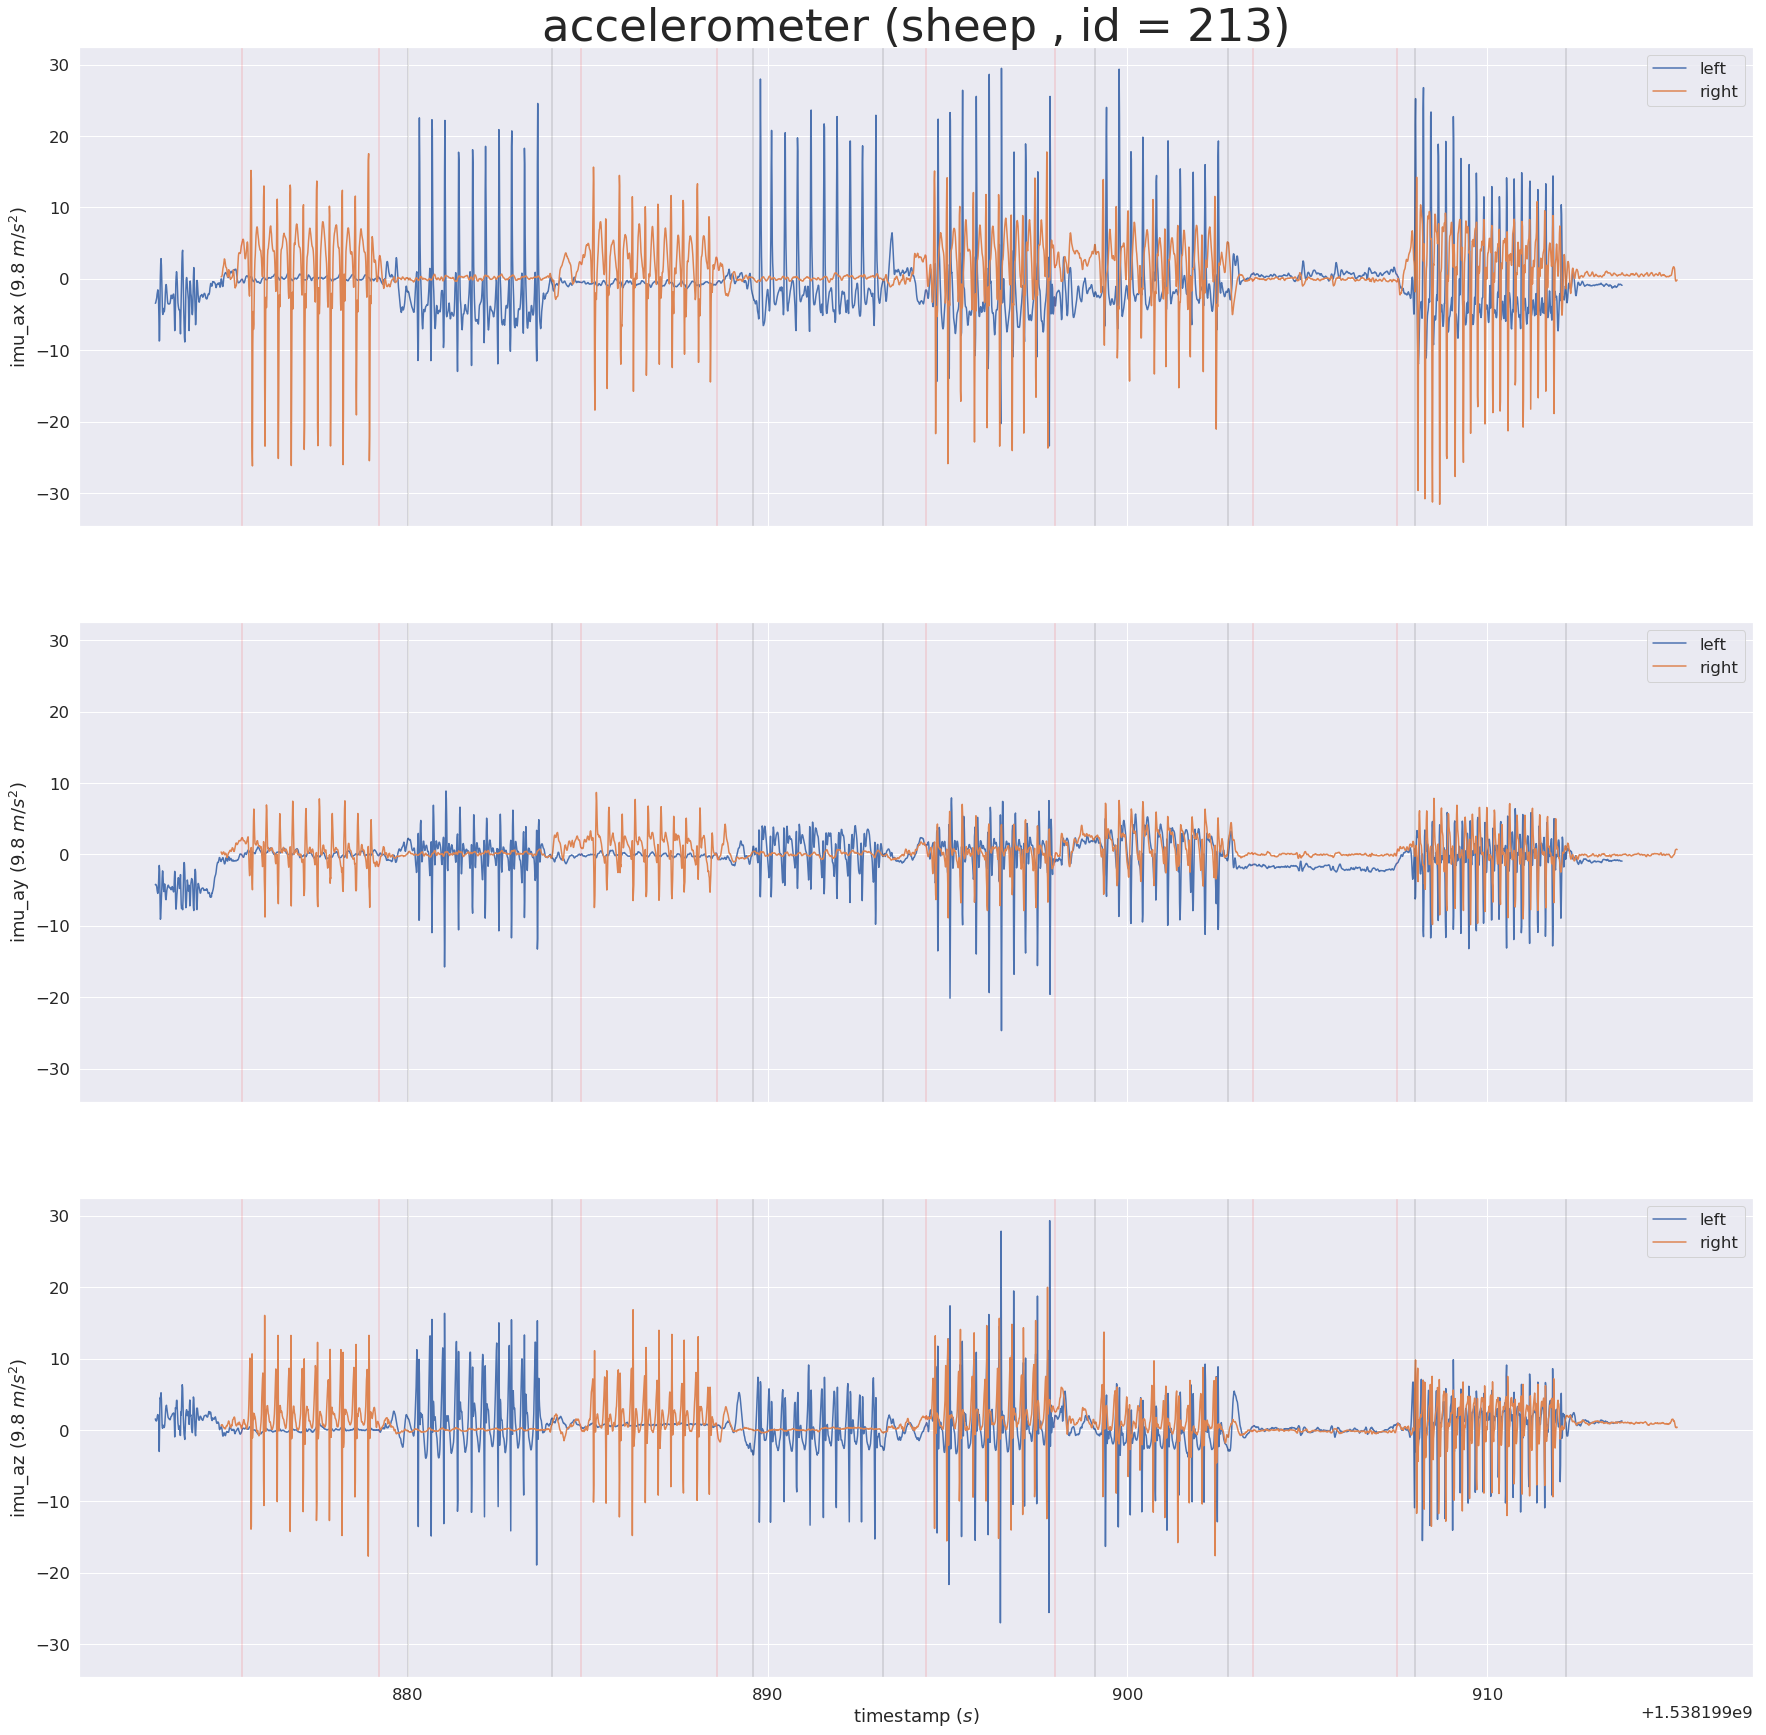

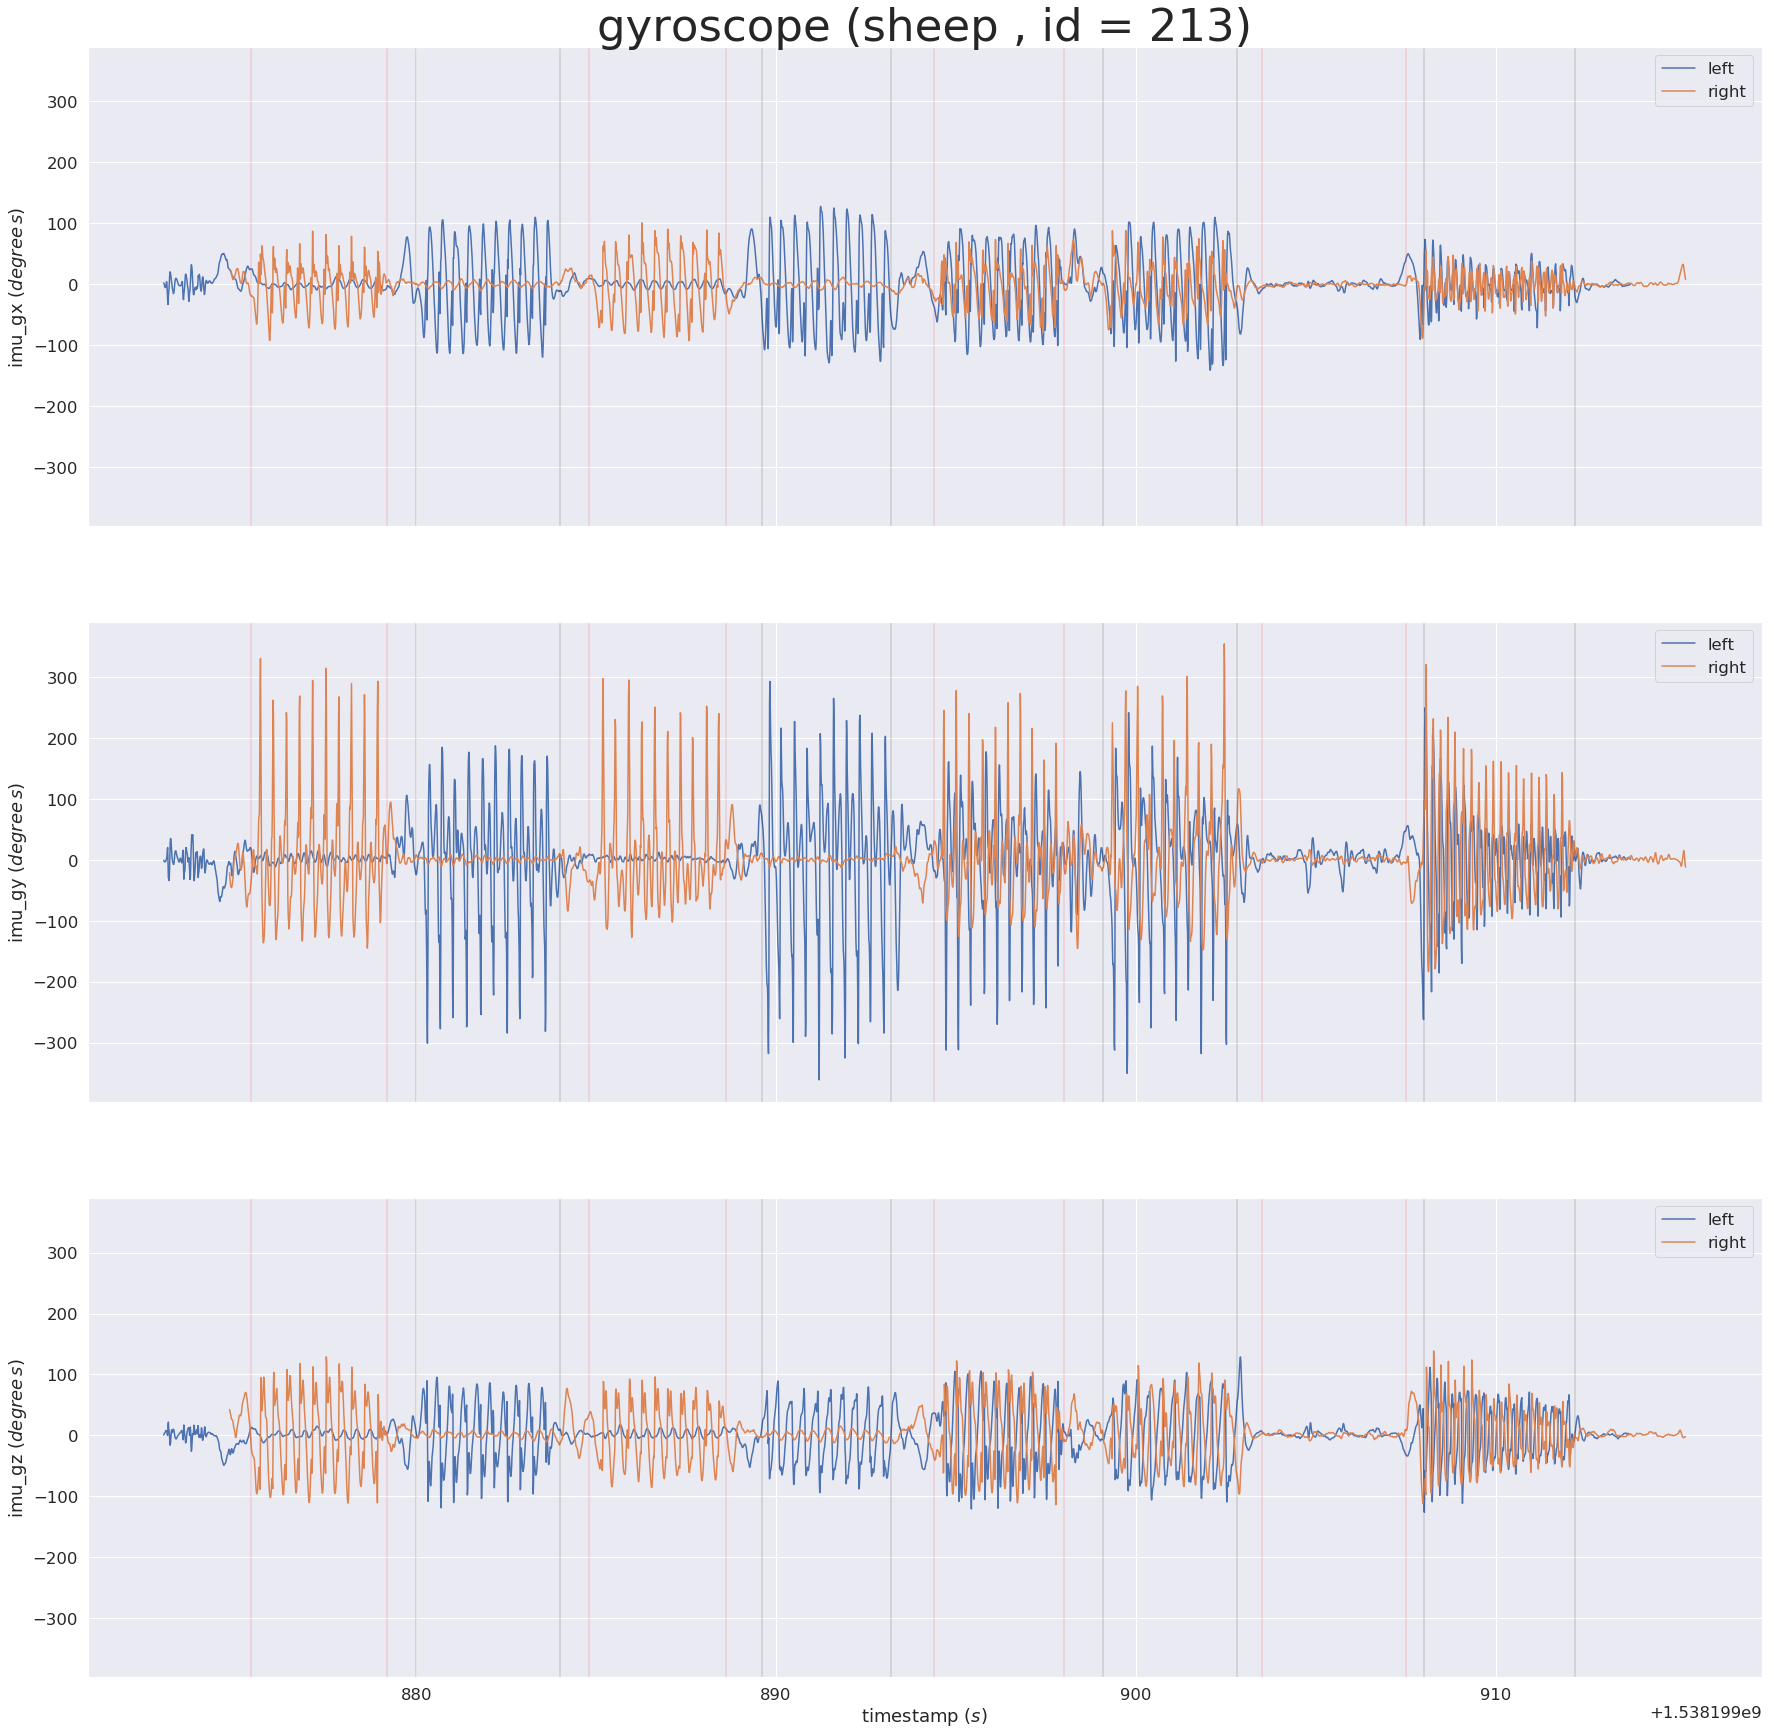

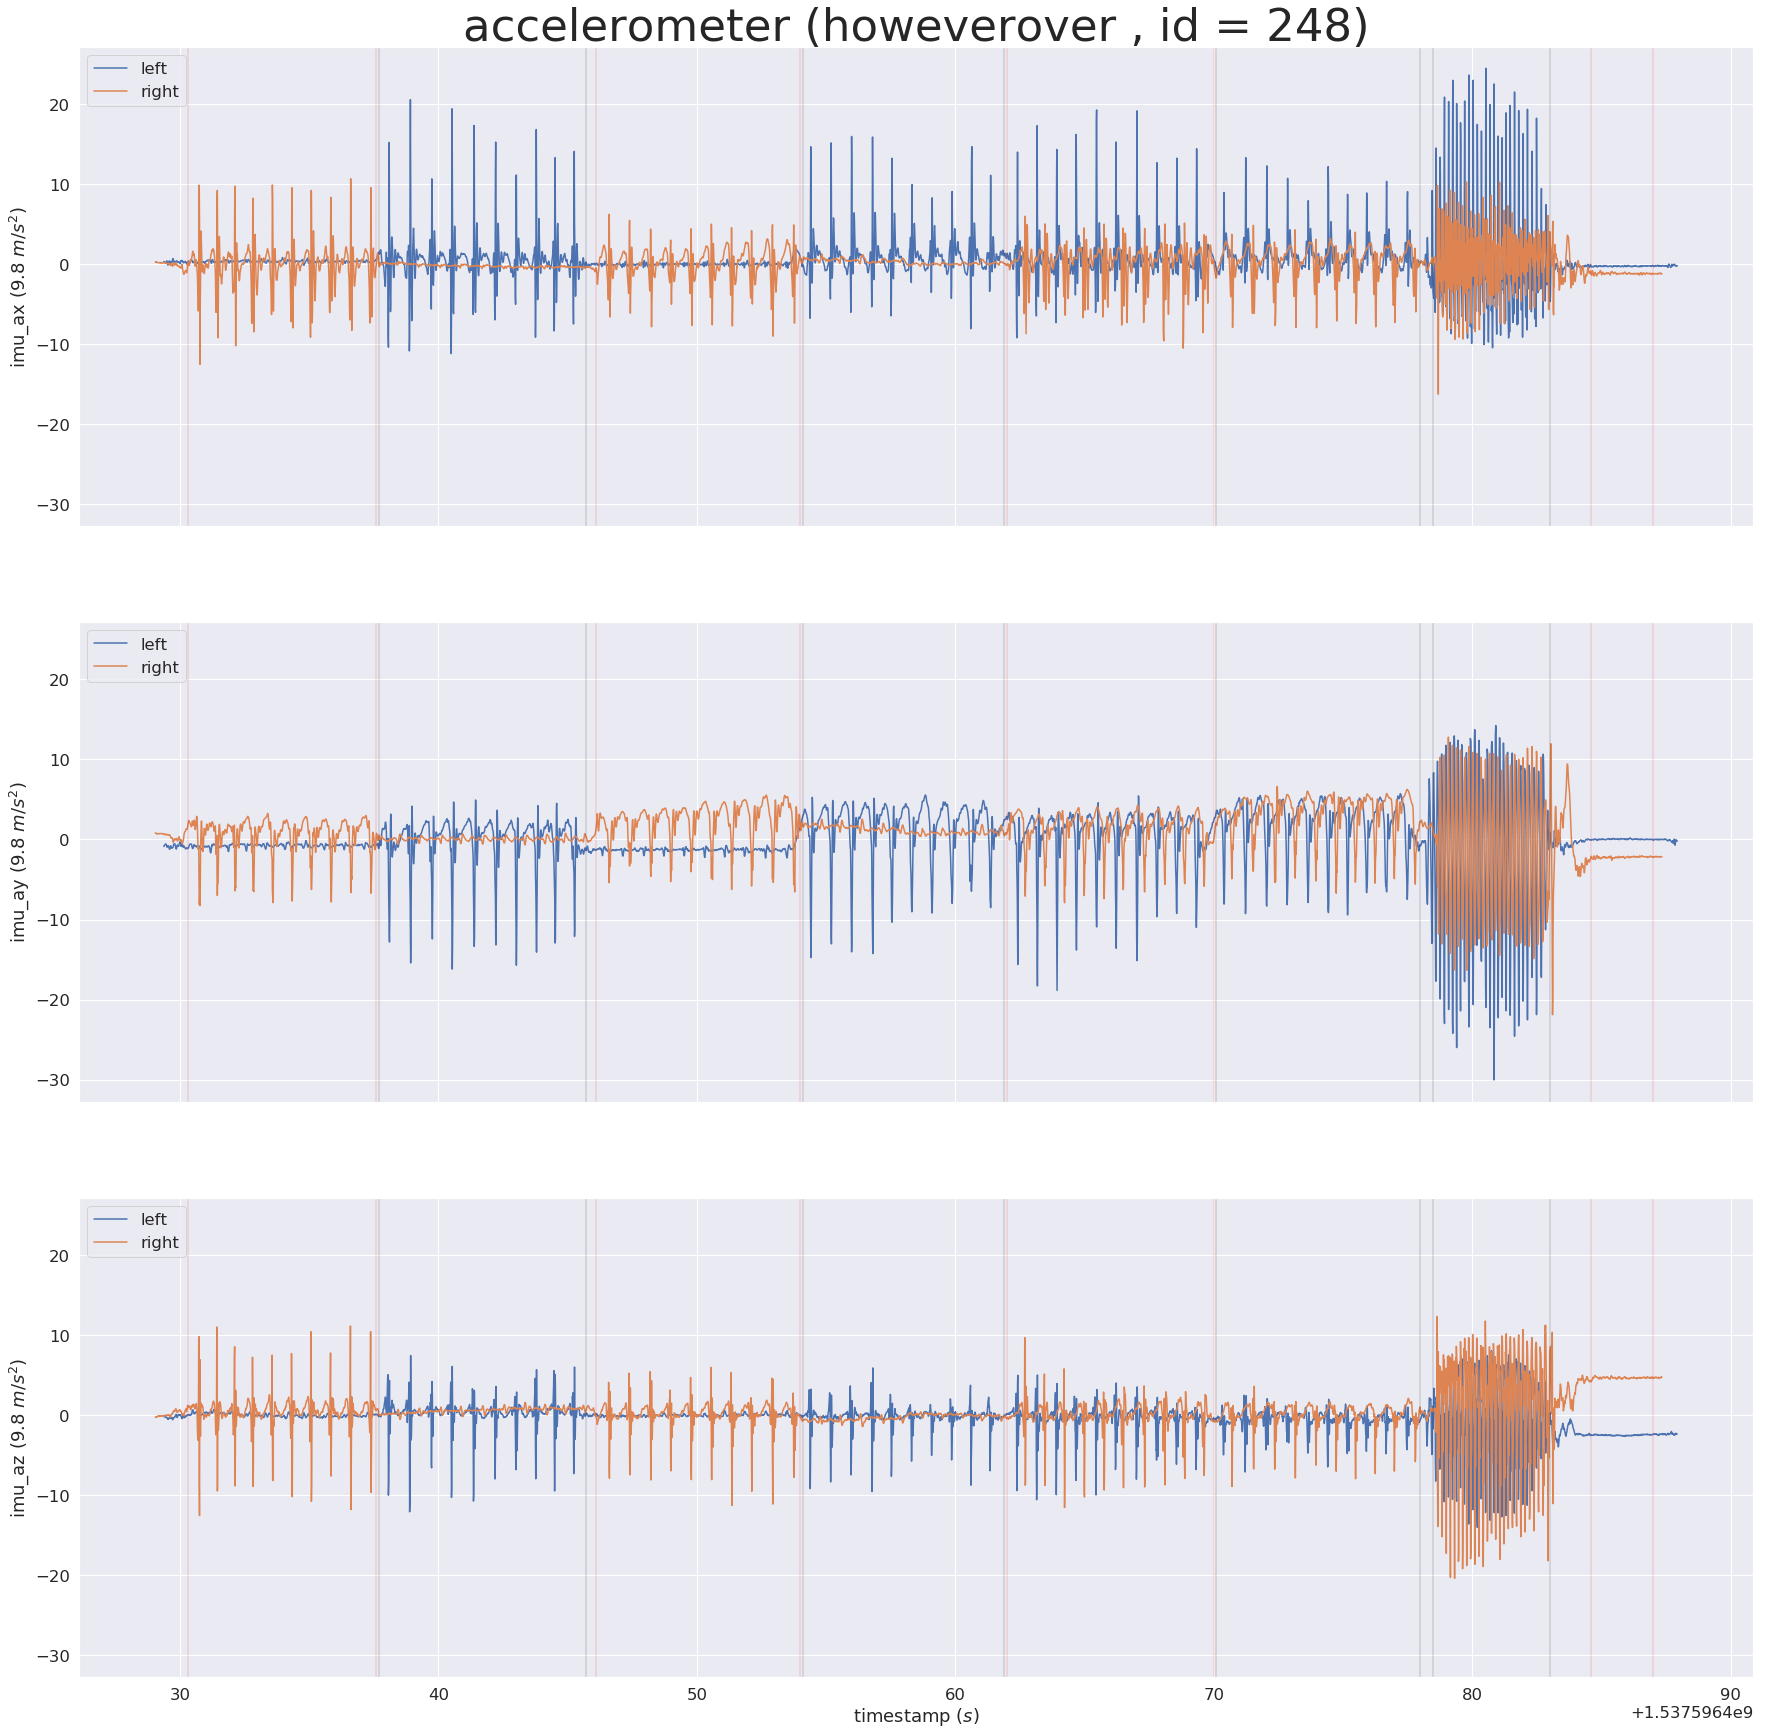

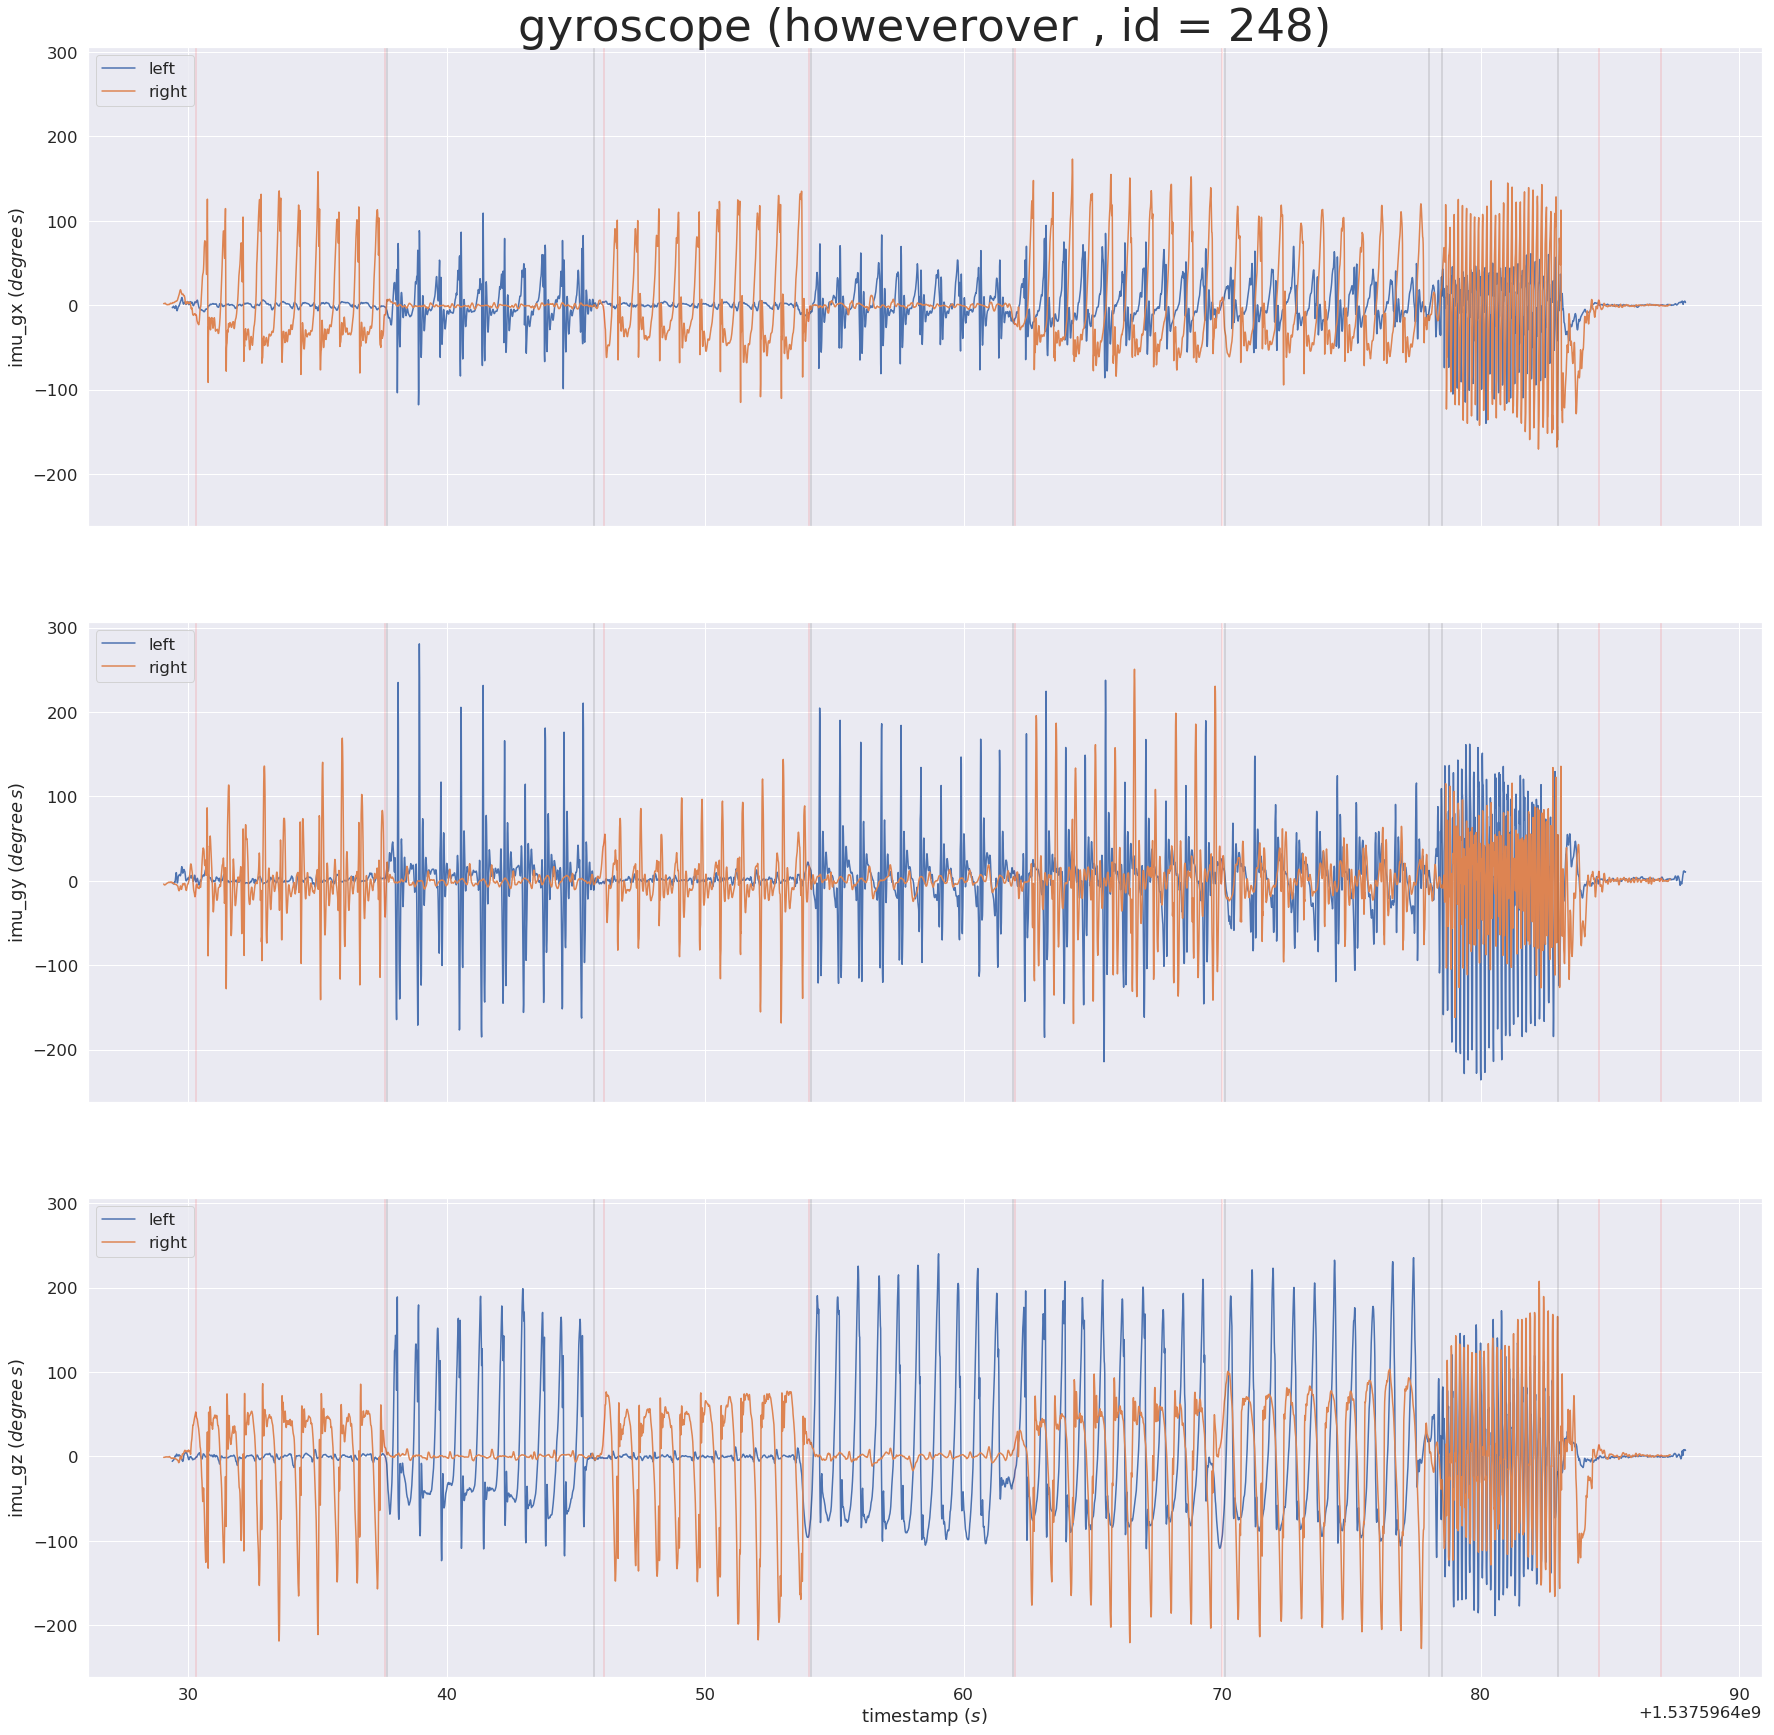

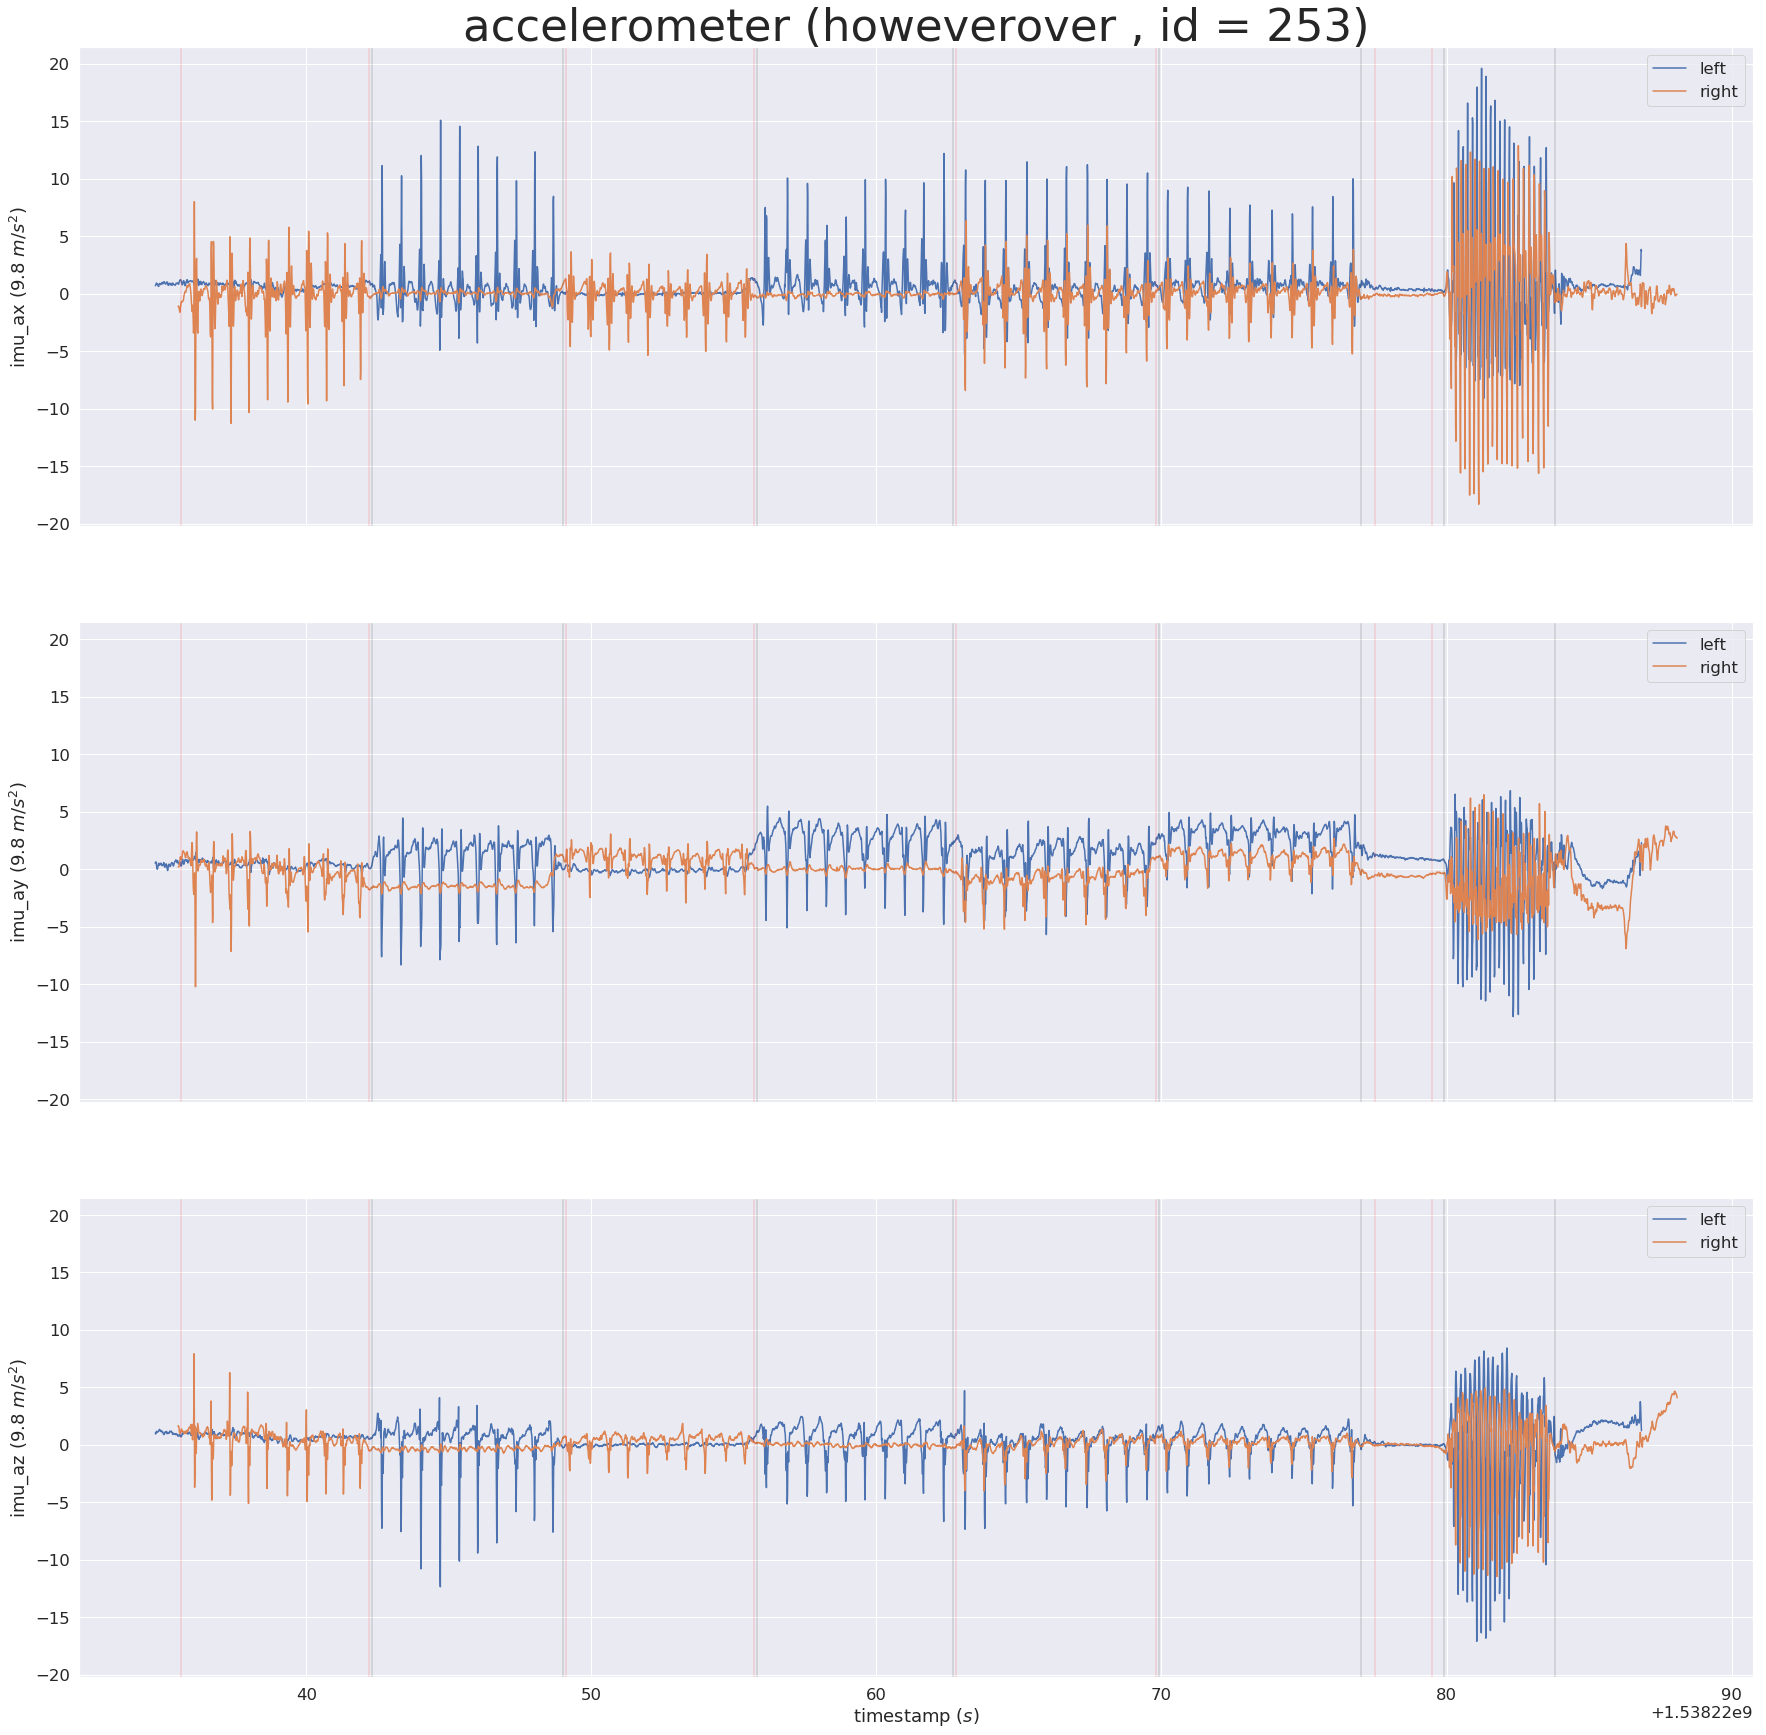

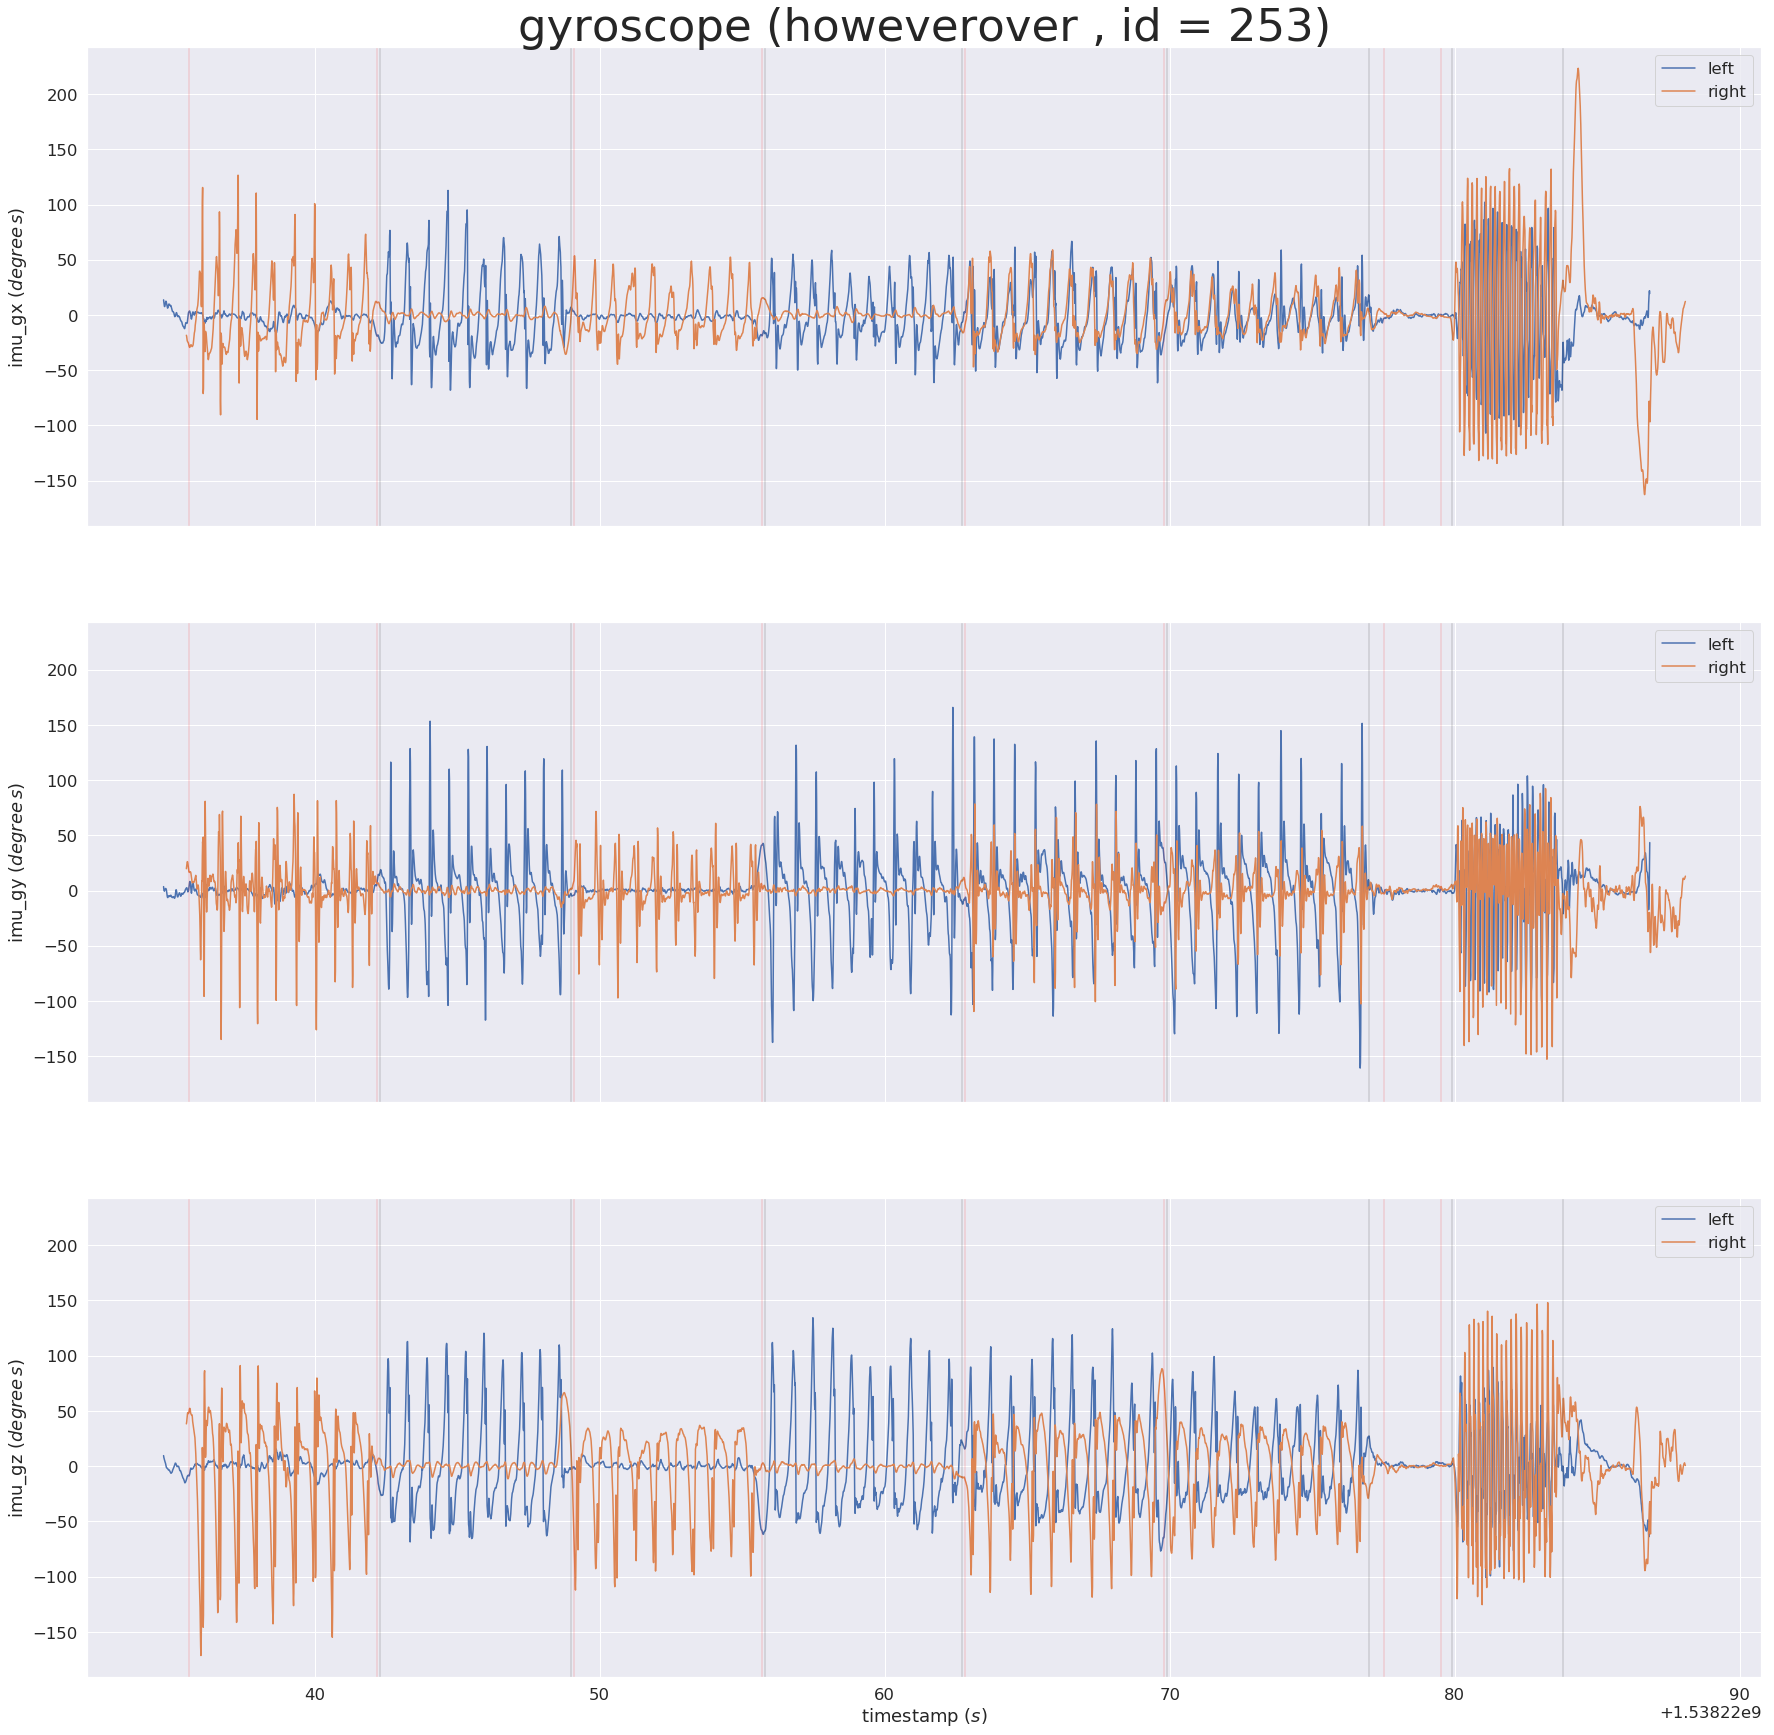

In [6]:
plot_profile('aaaaa')
plot_profile('oliver')
plot_profile('sheep')
plot_profile('howeverover')